### TASK

The task at hand involves constructing a predictive model that leverages various features associated with
a customer’s initial order. The objective is to determine whether a €5.00 voucher should be issued to a
specific customer. The model should be designed to predict if a customer will place a follow-up purchase
within a 90-day period following their initial purchase. This information is represented by the target90
variable in the dataset. Each customer who is predicted to not place a subsequent order will be send a
voucher.




Empirical analyses by the media retailer have shown that for 25% of the churning customers, the voucher
triggers a purchase with an average order value of €10. So if a voucher is sent to a customer who would
not actually have bought again, revenue increases by an average of €1.25. Conversely, sending a voucher
to a customer who would have placed an order anyway results in a revenue loss equivalent to the voucher
value of €5. For customers who don’t receive a voucher, there is no impact on revenues.






The model’s performance is evaluated based on the expected revenue across all customers in a given
dataset. This is computed by considering the model’s predictions in conjunction with the associated costs
and revenues. It’s crucial to note that the model’s effectiveness is directly tied to its ability to maximize
this expected revenue. Hence, the model should be optimized with this specific goal in mind.
The dataset for training is provided in the train.csv file. Detailed descriptions of the features can be
found in the data dictionary.pdf file.

summarytools missingno klib sweetviz

In [1]:
import os
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\inven\OneDrive\Escritorio\Python_datos\Project Jorge Mortiz


# EDA 


## 1.Loading the data into the data frame.

In [2]:
import pandas as pd
df = pd.read_csv('./data/train.csv',sep=';')
df.head(5)

C:\Users\inven\AppData\Local\Temp\ipykernel_30264\3712128402.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/train.csv',sep=';')


,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
0,41191,2008-12-01,0,0,9,2008-12-01,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,38860,2008-12-16,1,0,4,2008-12-16,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,61917,2008-08-19,0,0,12,2008-08-19,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40647,2008-06-16,1,0,8,2008-06-16,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
4,1347,2008-08-08,0,0,1,2008-08-08,0,1,1,1,...,2,0,0,0,0,0,0,0,0,0


In [3]:
df.tail(5)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
32423,7784,2008-10-21,1,0,8,2008-10-21,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
32424,41695,2008-11-09,1,0,4,2008-11-09,0,1,3,0,...,0,0,0,1,0,0,0,0,0,1
32425,7612,2008-04-12,2,0,9,2008-04-12,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
32426,31941,2008-11-15,0,0,12,2008-11-15,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32427,58849,2008-07-28,1,0,5,2008-07-28,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(32428, 38)

The dataframe where we gona train the model has in total 32.428 customer with 37 variables and the objective target90 

## 2 Checking the types of data

In [5]:
import pandas as pd

def reshape_columns_by_dtype(df):
    # Step 1: Create a list of tuples, where each tuple contains the data type and a column name
    columns_list = []
    for dtype, columns in df.dtypes.groupby(df.dtypes).groups.items():
        for column in columns:
            columns_list.append((str(dtype), column))
    
    # Step 2: Convert the list of tuples into a DataFrame
    reshaped_df = pd.DataFrame(columns_list, columns=['Data Type', 'Variable'])
    
    return reshaped_df



reshape_columns_by_dtype(df)

,Data Type,Variable
0,int64,customernumber
1,int64,salutation
2,int64,title
3,int64,domain
4,int64,newsletter
5,int64,model
6,int64,paymenttype
7,int64,deliverytype
8,int64,invoicepostcode
9,int64,voucher


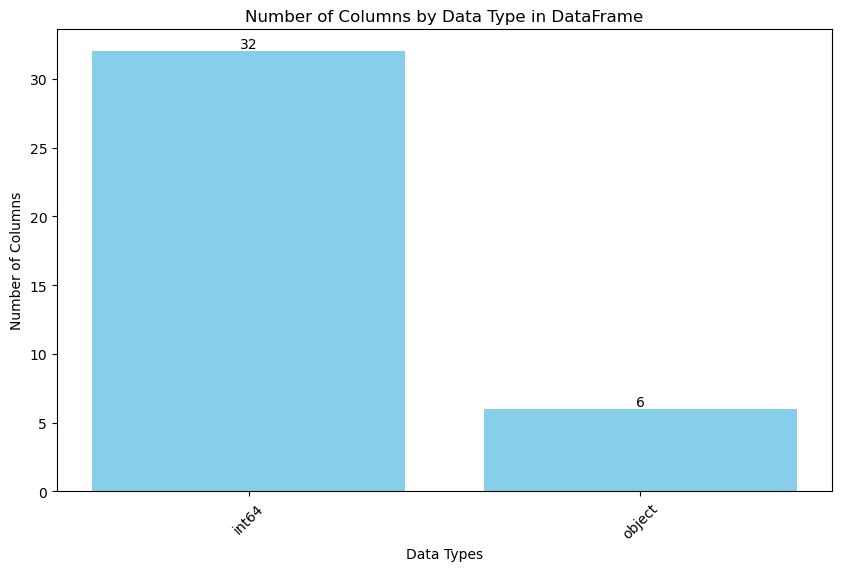

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_columns_by_dtype(df):
    # Group DataFrame columns by data type
    dtype_groups = df.columns.to_series().groupby(df.dtypes).groups
    
    # Prepare data for plotting: Count the number of columns for each data type
    dtype_counts = {str(k): len(v) for k, v in dtype_groups.items()}
    
    # Creating the plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(dtype_counts.keys(), dtype_counts.values(), color='skyblue')
    
    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Data Types')
    plt.ylabel('Number of Columns')
    plt.title('Number of Columns by Data Type in DataFrame')
    plt.xticks(rotation=45)
    plt.show()

plot_columns_by_dtype(df)


The dataframe consist in 32 vairbles in numerical and 6 in object time.

Whe well first revise if the object are correctet import in the datfarame and what kind of tranformation or drop they need.
Example a categorical variable like `satisfaction`  with values "Good","Bad","Mediocre" should be converted with package onehot-encoder in numbers

In [7]:

df.columns[df.dtypes == object]


Index(['date', 'datecreated', 'delivpostcode', 'advertisingdatacode',
       'deliverydatepromised', 'deliverydatereal'],
      dtype='object')

Looking  it make sense that this are objects. Also dictonary of the data show us tha we well use onehote encoder in the followings variables.
`salutation`,`title`, `domain`,`newsletter`,`model`, `paymenttype` `deliverytype` `voucher` `case` `gift`, `entry`, `points`,`shippingcosts` 
in ore df are numerical the meaning of this numbers are not linear they are categorical

Pensando en nuestro problema 

In [8]:

def custom_revenue_metric(y_true, y_pred):
    tn_gain = 1.25  # Ganancia por un True Negative
    fn_loss = -5    # Pérdida por un False Negative

    revenue = 0
    for true, pred in zip(y_true, y_pred):
        if pred == 0 and true == 0:  # True Negative (gain €1.25)
            revenue += tn_gain
        elif pred == 0 and true == 1:  # False Negative (loss €5)
            revenue += fn_loss
    return revenue


## 3  Dividing Train and Test data for EDA and rest of features and model construction

Avoid data Leakage by dividing test un train. Data leakage occurs when information from outside the training dataset is used to create a machine learning model, leading to overly optimistic performance estimates

Train-Test Contamination: When information from the test set leaks into the training set, often due to improper data splitting or feature engineering performed on the full dataset before splitting.


######
 **Note: To prevent data leakage, it is crucial to conduct exploratory data analysis (EDA) only on the training set after splitting the data. This ensures that any modifications and decisions are based solely on information the model should know, maintaining the integrity of the test set as truly unseen data.**


In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(df, test_size=0.20, random_state=1842,shuffle= True)


In [10]:
Train.shape

(25942, 38)

In [11]:
Test.shape

(6486, 38)

## 3.1 Distribution on target variable

In [12]:
Train.target90.value_counts(normalize=True) * 100

target90
0    81.20808
1    18.79192
Name: proportion, dtype: float64

In [13]:
Train.head(3)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
9783,35118,2008-07-29,1,0,0,2008-07-29,1,1,2,0,...,0,0,0,0,0,0,0,2,0,0
14874,65816,2008-05-16,0,0,9,2008-05-16,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
19293,55818,2008-12-14,0,0,4,2008-12-14,0,1,3,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
Train.isna().sum()[Train.isna().sum() > 0].sort_values(ascending=False)


delivpostcode          24831
advertisingdatacode    20711
dtype: int64

In [15]:
Test.target90.value_counts(normalize=True)* 100

target90
0    81.86864
1    18.13136
Name: proportion, dtype: float64

In [16]:
Test.head(3)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
19936,37269,2008-07-03,0,0,4,2008-07-03,0,1,2,0,...,0,0,0,0,0,0,0,1,0,1
2286,59202,2008-08-26,0,0,4,2008-06-22,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0
20906,33002,2008-11-23,1,0,2,2008-11-23,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Test.isna().sum()[Train.isna().sum() > 0].sort_values(ascending=False)

delivpostcode          6205
advertisingdatacode    5194
dtype: int64

Aftere revising missing values and or distribution of the target variable around 80% of the customer dindt buy back. there is a clear inbalanced of the data, 
that we try to resolve by utilisation of oversampling. In adittion there are only 2 variables with missing data the code of advertising and delivery post code.
Since there are really spceific data we decide to not use any type of inputations and will be droping this variables

## 4 Analisyis de variables

### 4.1 General EDA

#### With paclapckage `ydata_profiling` we are gonna find if there any problem in the features we wana use for or models 

In [18]:
from ydata_profiling import ProfileReport
profile = ProfileReport(Train, title="Profiling Target Report")


In [19]:
#profile

In [20]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
customernumber,25942.0,33393.809999,19147.688809,1.0,16844.75,33566.5,50057.75,66251.0
salutation,25942.0,0.541477,0.657922,0.0,0.00,0.0,1.00,2.0
title,25942.0,0.006784,0.082089,0.0,0.00,0.0,0.00,1.0
domain,25942.0,7.531532,3.676994,0.0,4.00,9.0,11.00,12.0
newsletter,25942.0,0.171112,0.376614,0.0,0.00,0.0,0.00,1.0
model,25942.0,1.650721,0.827288,1.0,1.00,1.0,2.00,3.0
paymenttype,25942.0,1.002120,1.091950,0.0,0.00,1.0,2.00,3.0
deliverytype,25942.0,0.204687,0.403481,0.0,0.00,0.0,0.00,1.0
invoicepostcode,25942.0,48.748015,24.317088,0.0,30.00,47.0,66.00,99.0
voucher,25942.0,0.162247,0.368684,0.0,0.00,0.0,0.00,1.0


With the help of tool we  analyse the following:
- There `25.942` of unique clients there for there no clients doing multiples buys in this periods or at least for our test data
- `Gifts`, `Title` and `w8` are highlig inmbalaced wiht 90-98% of the data balonging to the same class 
- `delivpostcode` 95.7% `advertisingdatacode` 79.8% missing values	Missing respectivelyt
- `Points` variable is useles with a 100% of values of 0 
- They are around 10 variables with hight correlation with other variables,The correlations are very intuitive, such as the number of items correlating with weight or delivery type correlating with payment type. These relationships may not add significant value



### 4.2 Mising values

<Axes: >

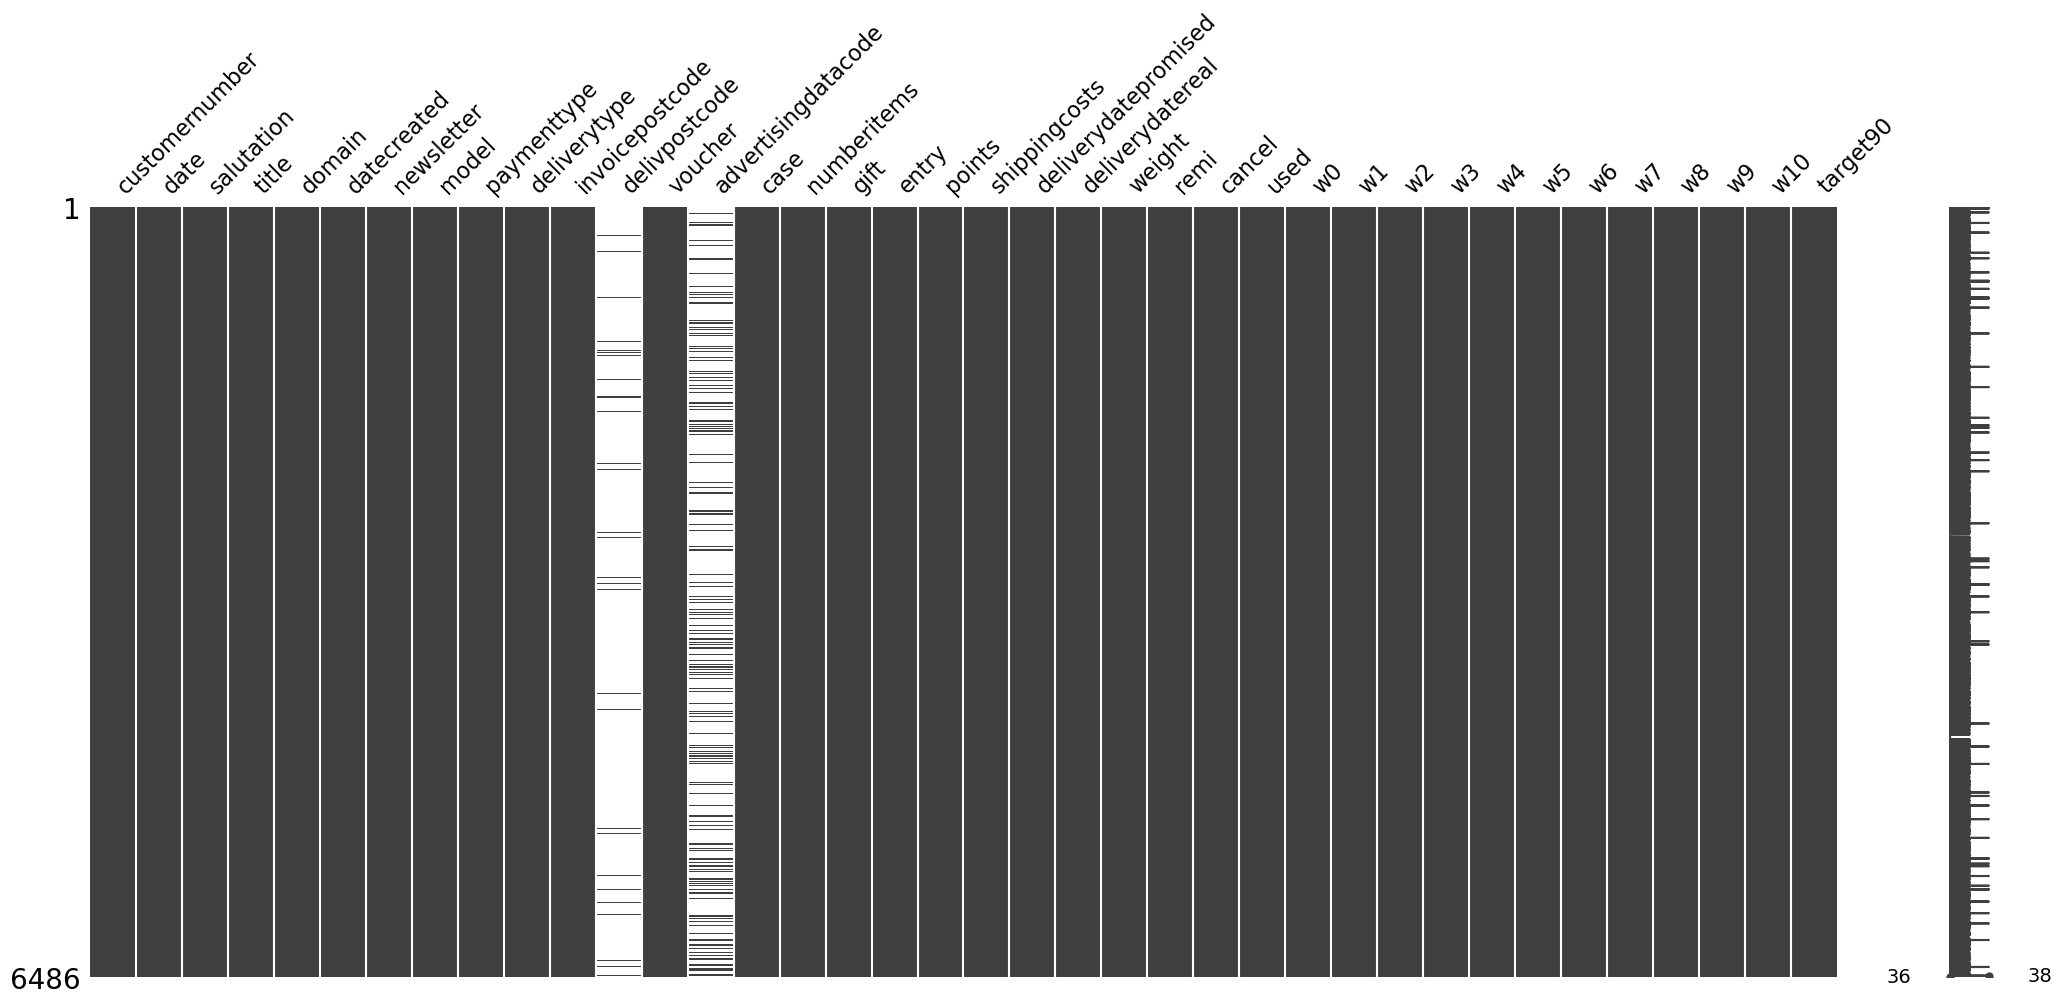

In [21]:
import missingno as msno

msno.matrix(Test)

no se habalr blabalalnb

Then we are gonna drop `delivpostcode` and `advertisingdatacode` also one hote encoder variable
which are truyly categorical

### 4.3 Features enconding by onehote encoder

First drop the on use variables

In [22]:
# Step1 (using this notation to proced with same este of procesing for test variables)
Train_variables = Train.drop(columns=["delivpostcode","advertisingdatacode","points"]) 

In [23]:
Train_variables.head(2)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
9783,35118,2008-07-29,1,0,0,2008-07-29,1,1,2,0,...,0,0,0,0,0,0,0,2,0,0
14874,65816,2008-05-16,0,0,9,2008-05-16,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Step3 encoder 
# Define categorical mappings
categorical_mappings = {
    'salutation': {0: 'Ms.', 1: 'Mr.', 2: 'Company'},
    'title': {0: 'No', 1: 'Yes'},
    'domain': {
        0: 'aol.com', 1: 'arcor.de', 2: 'freenet.de', 3: 'gmail.com',
        4: 'gmx.de', 5: 'hotmail.de', 6: 'online.de', 7: 'onlinehome.de',
        8: 't-online.de', 9: 'web.de', 10: 'yahoo.com', 11: 'yahoo.de', 12: 'others'
    },
    'newsletter': {0: 'No', 1: 'Yes'},
    'model': {1: '1', 2: '2', 3: '3'},
    'paymenttype': {
        0: 'Payment_on_invoice', 1: 'Cash_payment',
        2: 'Transfer_from_current_account', 3: 'Transfer_from_credit_card'
    },
    'deliverytype': {0: 'Dispatch', 1: 'Collection'},
    'voucher': {0: 'No', 1: 'Yes'},
    'case': {1: 'Low', 5: 'High'},
    'gift': {0: 'No', 1: 'Yes'},
    'shippingcosts': {0: 'No', 1: 'Yes'}
}

# Automatically select columns to encode based on categorical_mappings
columns_to_encode = list(categorical_mappings.keys())

# Initialize OneHotEncoder
ohe = (
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    .set_output(transform="pandas")
)

# Apply OneHotEncoder only on selected columns
encoded_columns = ohe.fit_transform(Train_variables[columns_to_encode])

# Rename the encoded columns based on the mappings
feature_names = ohe.get_feature_names_out(columns_to_encode)
renamed_columns = [
    f"{col}_{categorical_mappings[col].get(int(category.split('_')[1]), category)}"
    if col in categorical_mappings and category.split('_')[1].isdigit()
    else category
    for col, category in zip(feature_names, feature_names)
]

# Update column names in the encoded DataFrame
encoded_columns.columns = renamed_columns

# Combine the original non-encoded columns with the encoded ones
non_encoded_columns = Train_variables.drop(columns=columns_to_encode)
Train_encoded = pd.concat([non_encoded_columns.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

Train_encoded.head()


,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,0000-00-00,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [25]:
Train_encoded.isna().sum()[Train_encoded.isna().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [26]:
Train_encoded.shape

(25942, 64)

To ensure is write whe gonna compare one costumer

In [27]:
Train_encoded[Train_encoded.customernumber == 35118]

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [28]:
Train_variables[Train_variables.customernumber ==  35118]

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
9783,35118,2008-07-29,1,0,0,2008-07-29,1,1,2,0,...,0,0,0,0,0,0,0,2,0,0


Save for  Test data 

 Transform the test data using the fitted encoder
Test_encoded = ohe.transform(Test_variables[columns_to_encode])

 Rename the encoded columns based on the mappings
test_feature_names = ohe.get_feature_names_out(columns_to_encode)
test_renamed_columns = [
    f"{col}_{categorical_mappings[col].get(int(category.split('_')[1]), category)}"
    if col in categorical_mappings and category.split('_')[1].isdigit()
    else category
    for col, category in zip(test_feature_names, test_feature_names)
]

 Update column names in the encoded test DataFrame
Test_encoded.columns = test_renamed_columns

 Combine the non-encoded columns with the encoded ones for the test data
Test_non_encoded = Test_variables.drop(columns=columns_to_encode)
Test_transformed = pd.concat([Test_non_encoded.reset_index(drop=True), Test_encoded.reset_index(drop=True)], axis=1)

 Display the resulting test DataFrame
print("Transformed Test DataFrame:")
print(Test_transformed.head())


Whe have proof that the encoding was sucefull 

### 4.4 Correlation of variables an correlation between  target 

<Axes: title={'center': 'Feature-correlation (pearson)'}>

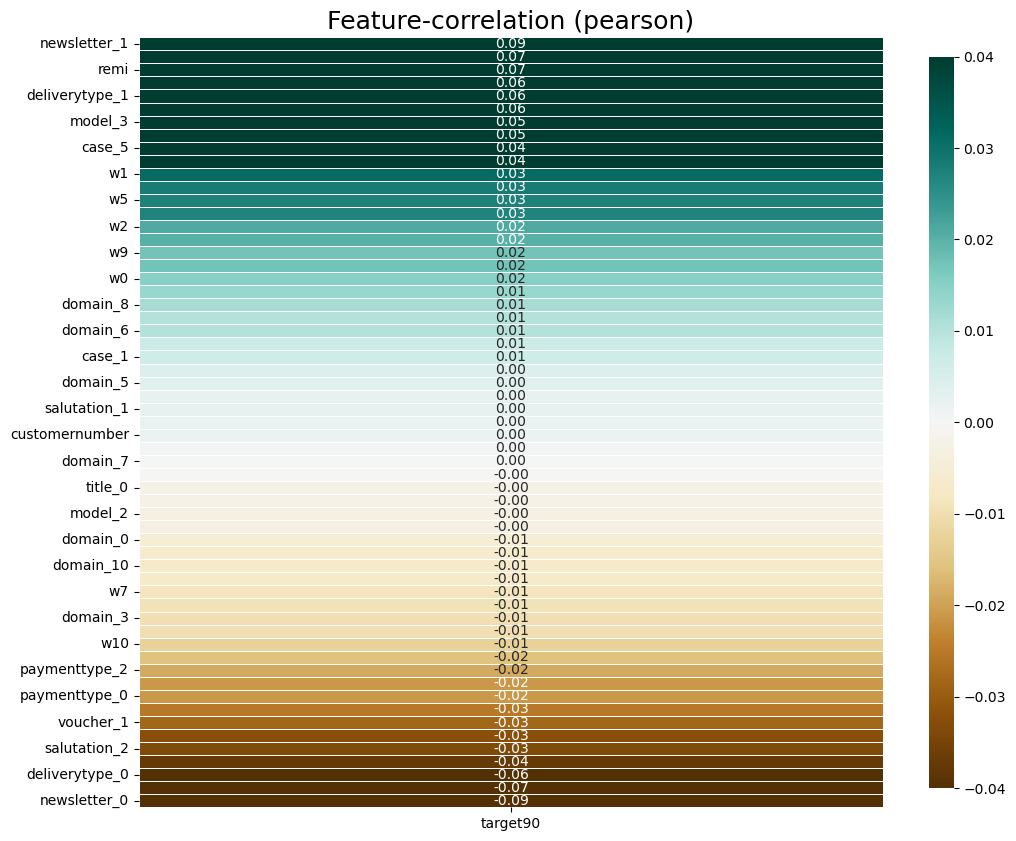

In [29]:
import klib
# Positive plot correlation
klib.corr_plot(Train_encoded,target='target90' ) 

In [30]:
numerical_v = Train_encoded.select_dtypes(include=['number'])

In [31]:
# Find correlations with the target and sort
correlations = numerical_v.corr()['target90'].sort_values()
correlations.head(5)

newsletter_0      -0.085371
shippingcosts_1   -0.068358
deliverytype_0    -0.062645
model_1           -0.037342
salutation_2      -0.033711
Name: target90, dtype: float64

In [32]:
correlations.tail(5)

deliverytype_1     0.062645
remi               0.066223
shippingcosts_0    0.068358
newsletter_1       0.085371
target90           1.000000
Name: target90, dtype: float64

We dont see any strong correlation 0.8 > so we are gona analyse only the variables newsletter shiping_cost  model  deliveritype
and  numberitems 

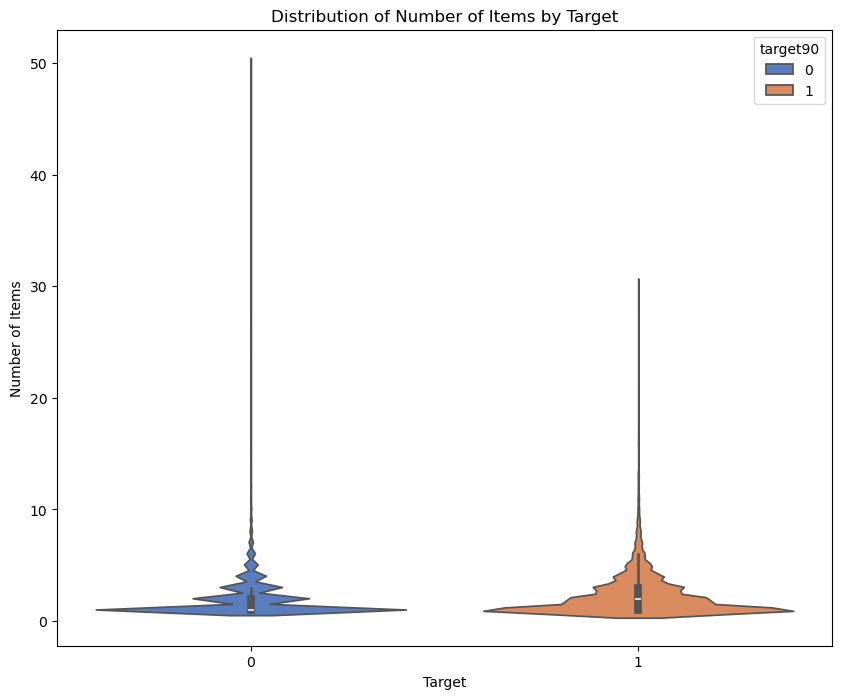

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Creating a violin plot
sns.violinplot(x='target90', y='numberitems', data=Train_encoded, palette="muted",hue="target90")

# Labeling the plot
plt.xlabel('Target')
plt.ylabel('Number of Items')
plt.title('Distribution of Number of Items by Target')

plt.show()


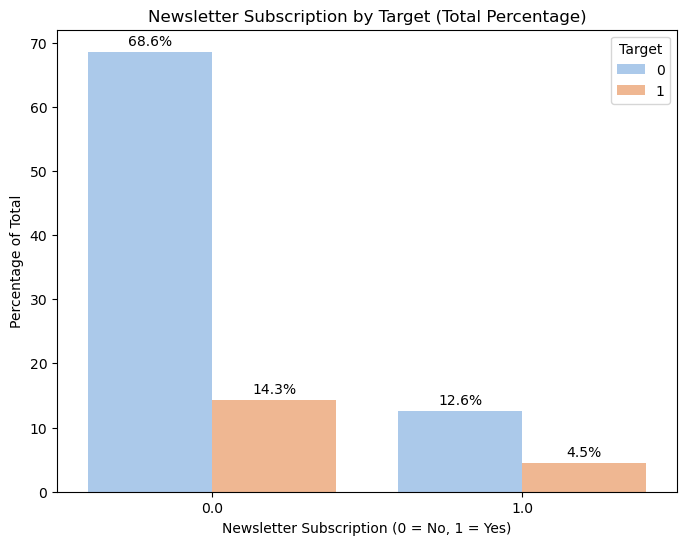

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentages based on the total dataset
grouped = Train_encoded.groupby(['newsletter_1', 'target90']).size().reset_index(name='count')
total_count = grouped['count'].sum()
grouped['percentage'] = grouped['count'] / total_count * 100

plt.figure(figsize=(8, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='newsletter_1', 
    y='percentage', 
    hue='target90', 
    data=grouped, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped.itertuples():
    plt.text(
        x=p.newsletter_1 - 0.2 + (0.4 * p.target90), 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Newsletter Subscription (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Total')
plt.title('Newsletter Subscription by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()


Contraintuitie people how are not subscride to the newsleter tend to buy again. Maby this kind of suscribe goes to spam 
or the customer feel it intrusive making a negative impact in the company 

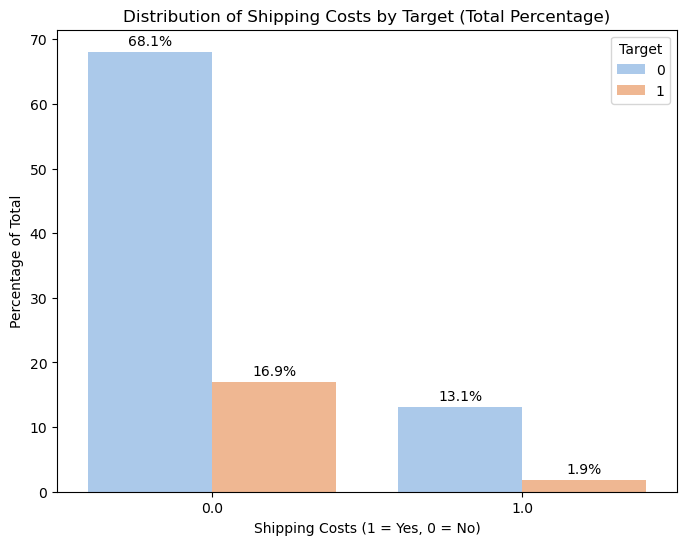

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentages based on the total dataset
grouped_shipping = Train_encoded.groupby(['shippingcosts_1', 'target90']).size().reset_index(name='count')
total_count = grouped_shipping['count'].sum()
grouped_shipping['percentage'] = grouped_shipping['count'] / total_count * 100

plt.figure(figsize=(8, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='shippingcosts_1', 
    y='percentage', 
    hue='target90', 
    data=grouped_shipping, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped_shipping.itertuples():
    plt.text(
        x=p.shippingcosts_1 - 0.2 + (0.4 * p.target90), 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Shipping Costs (1 = Yes, 0 = No)')
plt.ylabel('Percentage of Total')
plt.title('Distribution of Shipping Costs by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()


Make sense whe in the order is a extra fee there way lese person than buy again  15% more when this fee in not charged 

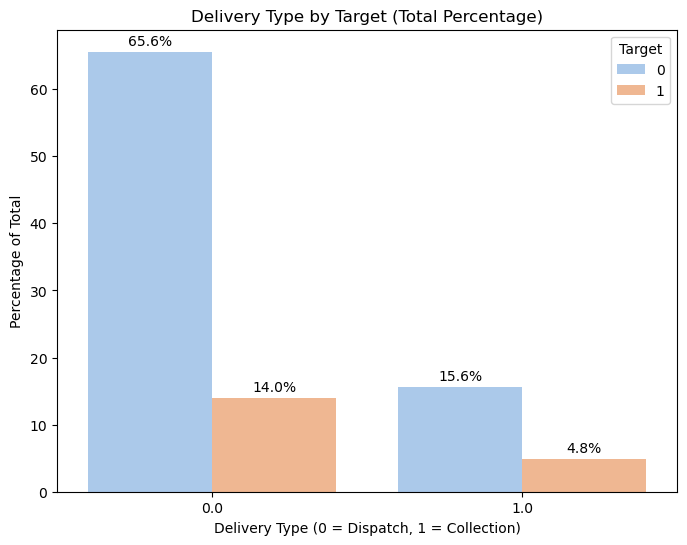

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentages based on the total dataset
grouped_delivery = Train_encoded.groupby(['deliverytype_1', 'target90']).size().reset_index(name='count')
total_count_delivery = grouped_delivery['count'].sum()
grouped_delivery['percentage'] = grouped_delivery['count'] / total_count_delivery * 100

plt.figure(figsize=(8, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='deliverytype_1', 
    y='percentage', 
    hue='target90', 
    data=grouped_delivery, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped_delivery.itertuples():
    plt.text(
        x=p.deliverytype_1 - 0.2 + (0.4 * p.target90), 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Delivery Type (0 = Dispatch, 1 = Collection)')
plt.ylabel('Percentage of Total')
plt.title('Delivery Type by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()


## 5 Feature Engineering

### 5.1 Domain Knowledge Features 
This space are for new features that make sense tha we can create

### New variable `delivery_difference and delivery_staturs`
first to know hoe much time of delay or early arrival. The other just a categorical to know the status

In [37]:
Train_encoded.deliverydatepromised.head(50)


0     2008-08-12
1     2008-05-20
2     2008-12-16
3     2008-06-10
4     2008-11-17
5     2008-09-05
6     2008-05-26
7     2008-09-29
8     2008-11-05
9     2008-11-28
10    2008-04-29
11    2008-11-19
12    2008-10-21
13    2008-12-09
14    2008-09-03
15    2008-10-14
16    2008-11-25
17    2008-11-14
18    2008-06-20
19    2008-05-14
20    2008-10-30
21    2008-04-25
22    2008-10-10
23    2008-08-05
24    2008-05-02
25    2008-07-30
26    2008-06-10
27    2008-05-22
28    2008-07-01
29    2008-06-20
30    2008-11-04
31    2008-05-28
32    2008-05-20
33    2008-07-22
34    2008-06-17
35    2008-12-10
36    2008-12-23
37    2008-06-13
38    2008-05-29
39    2008-08-19
40    2008-08-01
41    2008-06-25
42    2008-12-22
43    2008-09-25
44    2009-10-01
45    2008-07-11
46    2008-06-17
47    2008-09-09
48    2008-09-19
49    2008-07-28
Name: deliverydatepromised, dtype: object

In [38]:
Train_encoded[Train_encoded.deliverydatepromised == 0000-00-00]

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1


In [39]:
Train_encoded.deliverydatereal

0        2008-08-12
1        2008-05-17
2        0000-00-00
3        2008-06-07
4        2008-11-14
            ...    
25937    2008-06-17
25938    0000-00-00
25939    2008-07-10
25940    2008-12-04
25941    0000-00-00
Name: deliverydatereal, Length: 25942, dtype: object

In [40]:
Train_encoded

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,0000-00-00,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,27888,2008-06-16,2008-06-16,55,3,1,2008-06-18,2008-06-17,969,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
25938,28133,2008-06-07,2008-06-07,42,3,0,2008-06-10,0000-00-00,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
25939,58472,2008-07-09,2008-07-09,91,1,1,2008-07-11,2008-07-10,205,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25940,29315,2008-12-04,2008-12-04,41,2,1,2008-12-25,2008-12-04,978,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [41]:
Train_encoded_try_time = Train_encoded.copy()


In [42]:
# Step 1: Convert invalid dates in Train_encoded_try_time to NaT (Not a Time)
Train_encoded_try_time['deliverydatereal'] = pd.to_datetime(Train_encoded_try_time['deliverydatereal'], errors='coerce')
Train_encoded_try_time['deliverydatepromised'] = pd.to_datetime(Train_encoded_try_time['deliverydatepromised'], errors='coerce')

# Step 2: Calculate the difference in days
Train_encoded_try_time['delivery_difference'] = (Train_encoded_try_time['deliverydatereal'] - Train_encoded_try_time['deliverydatepromised']).dt.days

# Step 3: Impute invalid differences with the mean
mean_difference = Train_encoded_try_time['delivery_difference'].mean(skipna=True)  # Calculate mean ignoring NaN
Train_encoded_try_time['delivery_difference'] = Train_encoded_try_time['delivery_difference'].fillna(mean_difference)

# Step 4: Classify deliveries
def classify_delivery(days_diff):
    if pd.isna(days_diff):  # This case should no longer occur after imputing
        return 'Invalid Date'
    elif days_diff < 0:
        return 'Early'
    elif days_diff == 0:
        return 'On Time'
    else:
        return 'Late'

Train_encoded_try_time['delivery_status'] = Train_encoded_try_time['delivery_difference'].apply(classify_delivery)

# Display the processed DataFrame
print("\nProcessed DataFrame:")
Train_encoded_try_time[['deliverydatereal', 'deliverydatepromised', 'delivery_difference', 'delivery_status']].head(5)



Processed DataFrame:


,deliverydatereal,deliverydatepromised,delivery_difference,delivery_status
0,2008-08-12,2008-08-12,0.000000,On Time
1,2008-05-17,2008-05-20,-3.000000,Early
2,NaT,2008-12-16,-17.216823,Early
3,2008-06-07,2008-06-10,-3.000000,Early
4,2008-11-14,2008-11-17,-3.000000,Early


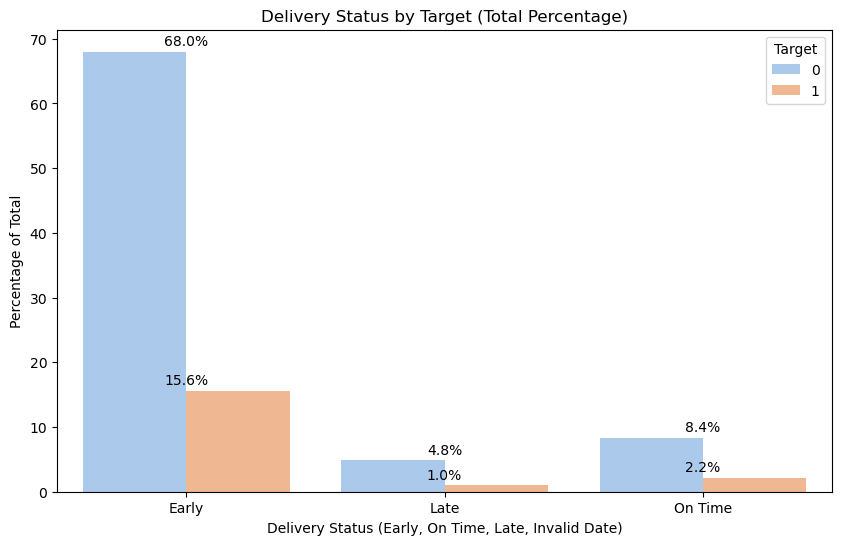

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# STEP6
grouped_delivery_status = Train_encoded_try_time.groupby(['delivery_status', 'target90']).size().reset_index(name='count')
total_count_status = grouped_delivery_status['count'].sum()
grouped_delivery_status['percentage'] = grouped_delivery_status['count'] / total_count_status * 100

plt.figure(figsize=(10, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='delivery_status', 
    y='percentage', 
    hue='target90', 
    data=grouped_delivery_status, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped_delivery_status.itertuples():
    plt.text(
        x=p.delivery_status, 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Delivery Status (Early, On Time, Late, Invalid Date)')
plt.ylabel('Percentage of Total')
plt.title('Delivery Status by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()


In [44]:
Train_encoded_try_time.delivery_difference.describe()

count    25942.000000
mean       -17.216823
std         66.084479
min       -369.000000
25%        -12.000000
50%         -1.000000
75%         -1.000000
max        368.000000
Name: delivery_difference, dtype: float64

In [45]:
Train_encoded_try_time

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,On Time
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-17.216823,Early
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,27888,2008-06-16,2008-06-16,55,3,1,2008-06-18,2008-06-17,969,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.000000,Early
25938,28133,2008-06-07,2008-06-07,42,3,0,2008-06-10,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-17.216823,Early
25939,58472,2008-07-09,2008-07-09,91,1,1,2008-07-11,2008-07-10,205,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.000000,Early
25940,29315,2008-12-04,2008-12-04,41,2,1,2008-12-25,2008-12-04,978,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-21.000000,Early


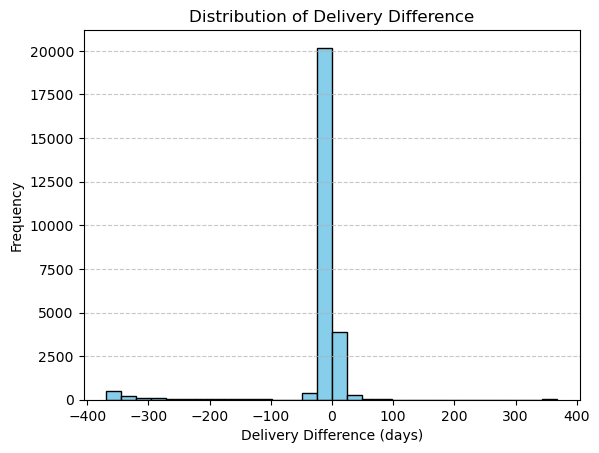

In [46]:
import matplotlib.pyplot as plt
plt.hist(Train_encoded_try_time['delivery_difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Difference')
plt.xlabel('Delivery Difference (days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most people than bought again recibed their compras early while there not seem to be Anny diferrence betwenn ontime and late 

In [47]:
Train_encoded_try_time.head()

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,On Time
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-17.216823,Early
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early


### New variable `issue_rate`

In [48]:
# issue rate 
df['issue_rate'] = (df['remi'] + df['cancel']) / df['numberitems']

print("\nDataFrame with Issue Rate:")
df.issue_rate.describe()


DataFrame with Issue Rate:


count    32428.000000
mean         0.069960
std          0.241697
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: issue_rate, dtype: float64

In [49]:
Train_encoded_try_time.loc[Train_encoded_try_time['delivery_difference'].nlargest(5).index]


,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
1566,2933,2008-04-02,2008-04-02,52,1,1,2008-05-02,2009-05-05,657,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,368.0,Late
3355,34317,2008-06-19,2008-06-19,25,4,1,2008-06-20,2009-06-23,708,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,368.0,Late
8241,23232,2008-12-08,2008-12-08,50,3,1,2008-12-10,2009-12-12,696,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,367.0,Late
18635,50066,2008-12-16,2008-12-16,50,3,0,2008-12-18,2009-12-20,354,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,367.0,Late
18450,2371,2008-12-02,2008-12-02,38,6,0,2008-12-03,2009-12-04,1051,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,366.0,Late


In [50]:
Train_encoded_try_time.loc[Train_encoded_try_time['delivery_difference'].nsmallest(5).index]


,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
190,13360,2008-08-26,2008-08-26,81,2,0,2009-08-31,2008-08-27,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-369.0,Early
1744,31952,2008-06-04,2008-06-04,89,6,0,2009-06-08,2008-06-04,1727,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-369.0,Early
2563,41497,2008-09-10,2008-09-10,69,1,0,2009-09-15,2008-09-11,139,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-369.0,Early
2822,39310,2008-11-26,2008-11-26,50,3,1,2009-11-30,2008-11-26,515,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-369.0,Early
2854,1713,2008-07-29,2008-07-29,42,1,0,2009-08-03,2008-07-30,820,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-369.0,Early


In [51]:
Train_encoded_try_time[Train_encoded_try_time['deliverydatereal'].dt.year == 2009]


,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
80,52289,2008-12-30,2008-12-30,21,1,0,2009-01-01,2009-01-03,223,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,Late
127,3881,2008-12-30,2008-12-30,52,2,1,2009-01-08,2009-01-05,777,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.0,Early
133,46164,2008-12-23,2008-12-23,59,1,0,2009-01-06,2009-01-08,519,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,Late
252,14541,2008-12-28,2008-12-28,71,1,1,2009-01-13,2009-01-02,434,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-11.0,Early
337,17944,2008-12-28,2008-12-28,24,2,0,2008-12-30,2009-01-05,644,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6.0,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25825,39881,2008-09-19,2008-09-19,45,2,1,2009-09-22,2009-03-18,960,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-188.0,Early
25838,37326,2009-01-23,2008-04-09,52,1,1,2009-02-16,2009-02-13,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.0,Early
25860,30767,2008-12-15,2008-12-15,53,1,0,2009-12-17,2009-03-21,788,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-271.0,Early
25874,2202,2008-09-24,2008-09-24,37,1,0,2008-09-26,2009-09-04,109,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,343.0,Late


In [52]:
# Calcular la media y desviación estándar
mean_value = Train_encoded_try_time['delivery_difference'].mean()
std_value = Train_encoded_try_time['delivery_difference'].std()

# Calcular los límites de los outliers
lower_limit = mean_value - 2 * std_value
upper_limit = mean_value + 2 * std_value

# Filtrar los outliers
outliers = Train_encoded_try_time[(Train_encoded_try_time['delivery_difference'] < lower_limit) | (Train_encoded_try_time['delivery_difference'] > upper_limit)]

# Contar cuántos son
num_outliers = len(outliers)

print(f"Número de outliers a más de 2 desviaciones estándar de la media: {num_outliers}")


Número de outliers a más de 2 desviaciones estándar de la media: 1110


In [53]:
# Filtrar filas donde delivery_difference está entre -100 y +100)
filtered_rows = Train_encoded_try_time[(Train_encoded_try_time['delivery_difference'] <-100) ]

# Mostrar las filas filtradas
filtered_rows.head(4)


,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
94,42914,2008-09-06,2008-09-06,12,1,0,2009-09-10,2008-09-17,442,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-358.0,Early
190,13360,2008-08-26,2008-08-26,81,2,0,2009-08-31,2008-08-27,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-369.0,Early
202,54966,2008-08-22,2008-08-21,31,6,1,2009-08-25,2008-09-04,3406,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-355.0,Early
216,2506,2008-08-09,2008-08-09,35,1,0,2009-08-12,2008-10-24,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-292.0,Early


Viendo los datos atipicos no teniendo sentido 1 años de demora en la fecha espera cuando el pedido llego en pocos dias  decidimos poner el año prometido el mismo 
que tiene el dia de la compra del pedido 

In [54]:
Train_encoded[Train_encoded.deliverydatepromised == 0000-00-00]

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1


In [55]:
# ------------------------------------------------------
# Step 1: Convert invalid dates in Train_encoded to NaT
# ------------------------------------------------------
Train_encoded['deliverydatereal'] = pd.to_datetime(
    Train_encoded['deliverydatereal'], errors='coerce'
)
Train_encoded['deliverydatepromised'] = pd.to_datetime(
    Train_encoded['deliverydatepromised'], errors='coerce'
)

Train_encoded['date'] = pd.to_datetime(Train_encoded['date'])
Train_encoded['deliverydatepromised'] = pd.to_datetime(Train_encoded['deliverydatepromised'])

Train_encoded['deliverydatepromised'] = Train_encoded.apply(
    lambda row: row['deliverydatepromised'].replace(year=row['date'].year), 
    axis=1
)


# ----------------------------------------
# Step 2: Calculate the difference in days
# ----------------------------------------
Train_encoded['delivery_difference'] = (
    Train_encoded['deliverydatereal'] - Train_encoded['deliverydatepromised']
).dt.days

# ------------------------------------------------------
# Step 3: Calculate mean and std, impute missing values
# ------------------------------------------------------
mean_difference = Train_encoded['delivery_difference'].mean(skipna=True)  # mean ignoring NaN
std_difference  = Train_encoded['delivery_difference'].std(skipna=True)   # std ignoring NaN

# Reemplazar los valores NaN con la media
Train_encoded['delivery_difference'] = Train_encoded['delivery_difference'].fillna(mean_difference)

# --------------------------------------------------------------------------
# Step 4: Para valores extremos (> 90 días), reemplazar con mean + 1 std
# --------------------------------------------------------------------------
Train_encoded.loc[
    Train_encoded['delivery_difference'] > 90, 
    'delivery_difference'
] = mean_difference + std_difference

# --------------------------------
# Step 5: Clasificar las entregas
# --------------------------------
def classify_delivery(days_diff):
    if pd.isna(days_diff):  # Este caso ya no debería ocurrir tras la imputación
        return 'Invalid Date'
    elif days_diff < 0:
        return 'Early'
    elif days_diff == 0:
        return 'On Time'
    else:
        return 'Late'

Train_encoded['delivery_status'] = Train_encoded['delivery_difference'].apply(classify_delivery)

# -------------------------------------------
# Ver el resultado en el DataFrame procesado
# -------------------------------------------
print("\nProcessed DataFrame:")
Train_encoded[['deliverydatereal', 'deliverydatepromised', 'delivery_difference', 'delivery_status']].head(5)



Processed DataFrame:


,deliverydatereal,deliverydatepromised,delivery_difference,delivery_status
0,2008-08-12,2008-08-12,0.000000,On Time
1,2008-05-17,2008-05-20,-3.000000,Early
2,NaT,2008-12-16,8.379869,Late
3,2008-06-07,2008-06-10,-3.000000,Early
4,2008-11-14,2008-11-17,-3.000000,Early


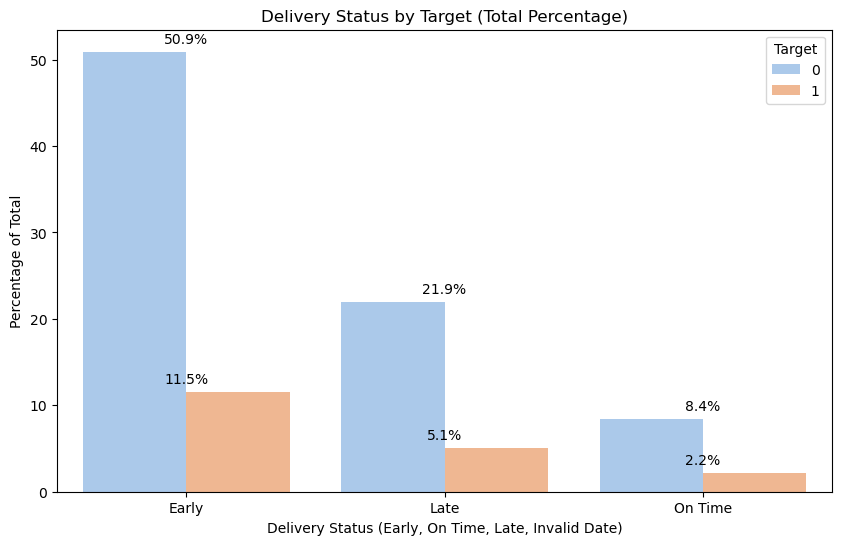

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# STEP6
grouped_delivery_status = Train_encoded.groupby(['delivery_status', 'target90']).size().reset_index(name='count')
total_count_status = grouped_delivery_status['count'].sum()
grouped_delivery_status['percentage'] = grouped_delivery_status['count'] / total_count_status * 100

plt.figure(figsize=(10, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='delivery_status', 
    y='percentage', 
    hue='target90', 
    data=grouped_delivery_status, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped_delivery_status.itertuples():
    plt.text(
        x=p.delivery_status, 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Delivery Status (Early, On Time, Late, Invalid Date)')
plt.ylabel('Percentage of Total')
plt.title('Delivery Status by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()


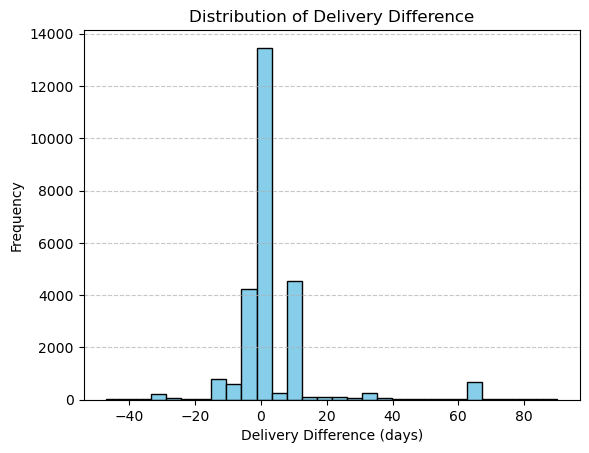

In [57]:
import matplotlib.pyplot as plt
plt.hist(Train_encoded['delivery_difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Difference')
plt.xlabel('Delivery Difference (days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Tratamos de hacer 2 transformaciones porque seguramente el deliverydatepromised tiene algunos problemas 
primeo quitamos la mayoria de entregas muy temprana poniendo que el año prometido era el mismo que el año que se pidio ya que tiene sentido.
Yb para los valores muy extremos la media de los valoras mas 1 desviacion estandar para asegura que sten el valores normales

In [58]:
Train_encoded

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,On Time
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.379869,Late
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,27888,2008-06-16,2008-06-16,55,3,1,2008-06-18,2008-06-17,969,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.000000,Early
25938,28133,2008-06-07,2008-06-07,42,3,0,2008-06-10,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.379869,Late
25939,58472,2008-07-09,2008-07-09,91,1,1,2008-07-11,2008-07-10,205,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.000000,Early
25940,29315,2008-12-04,2008-12-04,41,2,1,2008-12-25,2008-12-04,978,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-21.000000,Early


###  `Product_diversity`

In [59]:
# Counting diferent from product'w0' to 'w10' exist in the DataFrame
Train_encoded['Product_diversity'] = np.count_nonzero(Train_encoded[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10']], axis=1)


In [60]:
Train_encoded.Product_diversity.describe()

count    25942.000000
mean         1.188459
std          0.516996
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Product_diversity, dtype: float64

onehot encoder y dropear las fechas del dataset

In [61]:
Train_encoded.select_dtypes(exclude=['number']).columns

Index(['date', 'datecreated', 'deliverydatepromised', 'deliverydatereal',
       'delivery_status'],
      dtype='object')

In [62]:
Train_finish = Train_encoded.copy()

In [63]:
Train_finish.drop(columns=["date","datecreated","deliverydatepromised","deliverydatereal"],inplace=True)

In [64]:
Train_finish.head(3)

,customernumber,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,...,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status,Product_diversity
0,35118,36,2,0,741,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,On Time,1
1,65816,20,1,0,729,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early,1
2,55818,20,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.379869,Late,1


In [65]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Supongamos que tu DataFrame es Train_finish 
# y tu columna categórica es 'delivery_status'.

# 1. Instanciar el OneHotEncoder (desactiva salida esparsa para tener un array denso)
ohe_delivery_status = OneHotEncoder(sparse_output=False)

# 2. Ajustar y transformar la columna 'delivery_status'
delivery_status_encoded = ohe_delivery_status.fit_transform(Train_finish[['delivery_status']])

# 3. Crear un DataFrame con la salida transformada
df_delivery_status_ohe = pd.DataFrame(
    delivery_status_encoded,
    columns=ohe_delivery_status.get_feature_names_out(['delivery_status'])
)

# 4. Renombrar las columnas si deseas un nombre más personalizado
df_delivery_status_ohe.columns = [
    col.replace("delivery_status_", "ds_") for col in df_delivery_status_ohe.columns
]

# 5. Concatenar con el DataFrame original, excluyendo la columna antigua
Train_finish_ohe = pd.concat(
    [Train_finish.drop(columns=['delivery_status']), df_delivery_status_ohe],
    axis=1
)

# Veamos los primeros renglones del nuevo DataFrame
Train_finish_ohe.head()


,customernumber,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,...,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,Product_diversity,ds_Early,ds_Late,ds_On Time
0,35118,36,2,0,741,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.000000,1,0.0,0.0,1.0
1,65816,20,1,0,729,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,-3.000000,1,1.0,0.0,0.0
2,55818,20,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,8.379869,1,0.0,1.0,0.0
3,34566,76,2,0,571,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,-3.000000,1,1.0,0.0,0.0
4,55290,31,2,1,1049,0,0,0,2,0,...,0.0,1.0,0.0,1.0,0.0,-3.000000,1,1.0,0.0,0.0


### 5.4 Transform test data with the proces 

In [66]:
# Step 1: Drop irrelevant columns from Test data
Test_variables = Test.drop(columns=["delivpostcode", "advertisingdatacode", "points"])

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Step 3: One-hot encode categorical variables
categorical_mappings = {
    'salutation': {0: 'Ms.', 1: 'Mr.', 2: 'Company'},
    'title': {0: 'No', 1: 'Yes'},
    'domain': {
        0: 'aol.com', 1: 'arcor.de', 2: 'freenet.de', 3: 'gmail.com',
        4: 'gmx.de', 5: 'hotmail.de', 6: 'online.de', 7: 'onlinehome.de',
        8: 't-online.de', 9: 'web.de', 10: 'yahoo.com', 11: 'yahoo.de', 12: 'others'
    },
    'newsletter': {0: 'No', 1: 'Yes'},
    'model': {1: '1', 2: '2', 3: '3'},
    'paymenttype': {
        0: 'Payment_on_invoice', 1: 'Cash_payment',
        2: 'Transfer_from_current_account', 3: 'Transfer_from_credit_card'
    },
    'deliverytype': {0: 'Dispatch', 1: 'Collection'},
    'voucher': {0: 'No', 1: 'Yes'},
    'case': {1: 'Low', 5: 'High'},
    'gift': {0: 'No', 1: 'Yes'},
    'shippingcosts': {0: 'No', 1: 'Yes'}
}

# Select columns to encode
columns_to_encode = list(categorical_mappings.keys())

# Initialize OneHotEncoder
ohe = (
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    .set_output(transform="pandas")
)

# Apply OneHotEncoder
encoded_columns = ohe.fit_transform(Test_variables[columns_to_encode])

# Rename the encoded columns
feature_names = ohe.get_feature_names_out(columns_to_encode)
renamed_columns = [
    f"{col}_{categorical_mappings[col].get(int(category.split('_')[1]), category)}"
    if col in categorical_mappings and category.split('_')[1].isdigit()
    else category
    for col, category in zip(feature_names, feature_names)
]

encoded_columns.columns = renamed_columns

# Combine the original non-encoded columns with the encoded ones
non_encoded_columns = Test_variables.drop(columns=columns_to_encode)
Test_encoded = pd.concat([non_encoded_columns.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

# Step 1: Convert invalid dates in Test_encoded to NaT
Test_encoded['deliverydatereal'] = pd.to_datetime(Test_encoded['deliverydatereal'], errors='coerce')
Test_encoded['deliverydatepromised'] = pd.to_datetime(Test_encoded['deliverydatepromised'], errors='coerce')

# Step 2: Calculate the difference in days
Test_encoded['delivery_difference'] = (
    Test_encoded['deliverydatereal'] - Test_encoded['deliverydatepromised']
).dt.days

# Step 3: Impute invalid differences with the mean
mean_difference = Test_encoded['delivery_difference'].mean(skipna=True)
std_difference = Test_encoded['delivery_difference'].std(skipna=True)

Test_encoded['delivery_difference'] = Test_encoded['delivery_difference'].fillna(mean_difference)

# Replace extreme values (> 90 days) with mean + 1 std
Test_encoded.loc[
    Test_encoded['delivery_difference'] > 90, 'delivery_difference'
] = mean_difference + std_difference

# Step 5: Classify deliveries
def classify_delivery(days_diff):
    if pd.isna(days_diff):
        return 'Invalid Date'
    elif days_diff < 0:
        return 'Early'
    elif days_diff == 0:
        return 'On Time'
    else:
        return 'Late'

Test_encoded['delivery_status'] = Test_encoded['delivery_difference'].apply(classify_delivery)

# Product diversity calculation
Test_encoded['Product_diversity'] = np.count_nonzero(
    Test_encoded[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10']], axis=1
)

Test_finish = Test_encoded.copy()

# Drop date-related columns
Test_finish.drop(columns=["date", "datecreated", "deliverydatepromised", "deliverydatereal"], inplace=True)

# Encode delivery_status
ohe_delivery_status = OneHotEncoder(sparse_output=False)
delivery_status_encoded = ohe_delivery_status.fit_transform(Test_finish[['delivery_status']])

df_delivery_status_ohe = pd.DataFrame(
    delivery_status_encoded,
    columns=ohe_delivery_status.get_feature_names_out(['delivery_status'])
)

df_delivery_status_ohe.columns = [
    col.replace("delivery_status_", "ds_") for col in df_delivery_status_ohe.columns
]

Test_finish_ohe = pd.concat(
    [Test_finish.drop(columns=['delivery_status']), df_delivery_status_ohe],
    axis=1
)

Test_finish_ohe.head()


,customernumber,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,...,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,Product_diversity,ds_Early,ds_Late,ds_On Time
0,37269,33,1,0,672,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,1.0,1,0.0,1.0,0.0
1,59202,22,1,1,313,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1,0.0,0.0,1.0
2,33002,58,1,0,870,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,-1.0,1,1.0,0.0,0.0
3,4470,70,1,1,175,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,-1.0,1,1.0,0.0,0.0
4,32151,40,3,1,916,0,0,0,3,0,...,0.0,1.0,0.0,1.0,0.0,-1.0,1,1.0,0.0,0.0


In [67]:
Test_finish_ohe.shape

(6486, 65)

# Intentional error

In [68]:
Intentional error in case to not run all models

SyntaxError: invalid syntax (92208987.py, line 1)

### 5.5 no optimization models

Try models with out optimization

c:\Users\inven\anaconda3\envs\master\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\inven\AppData\Local\Temp\ipykernel_9672\3850443059.py:93: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  base_results_df = pd.concat([base_results_df, pd.DataFrame([voucher_results])], ignore_index=True)
C:\Users\inven\AppData\Local\Temp\ipykernel_9672\3850443059.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\inve

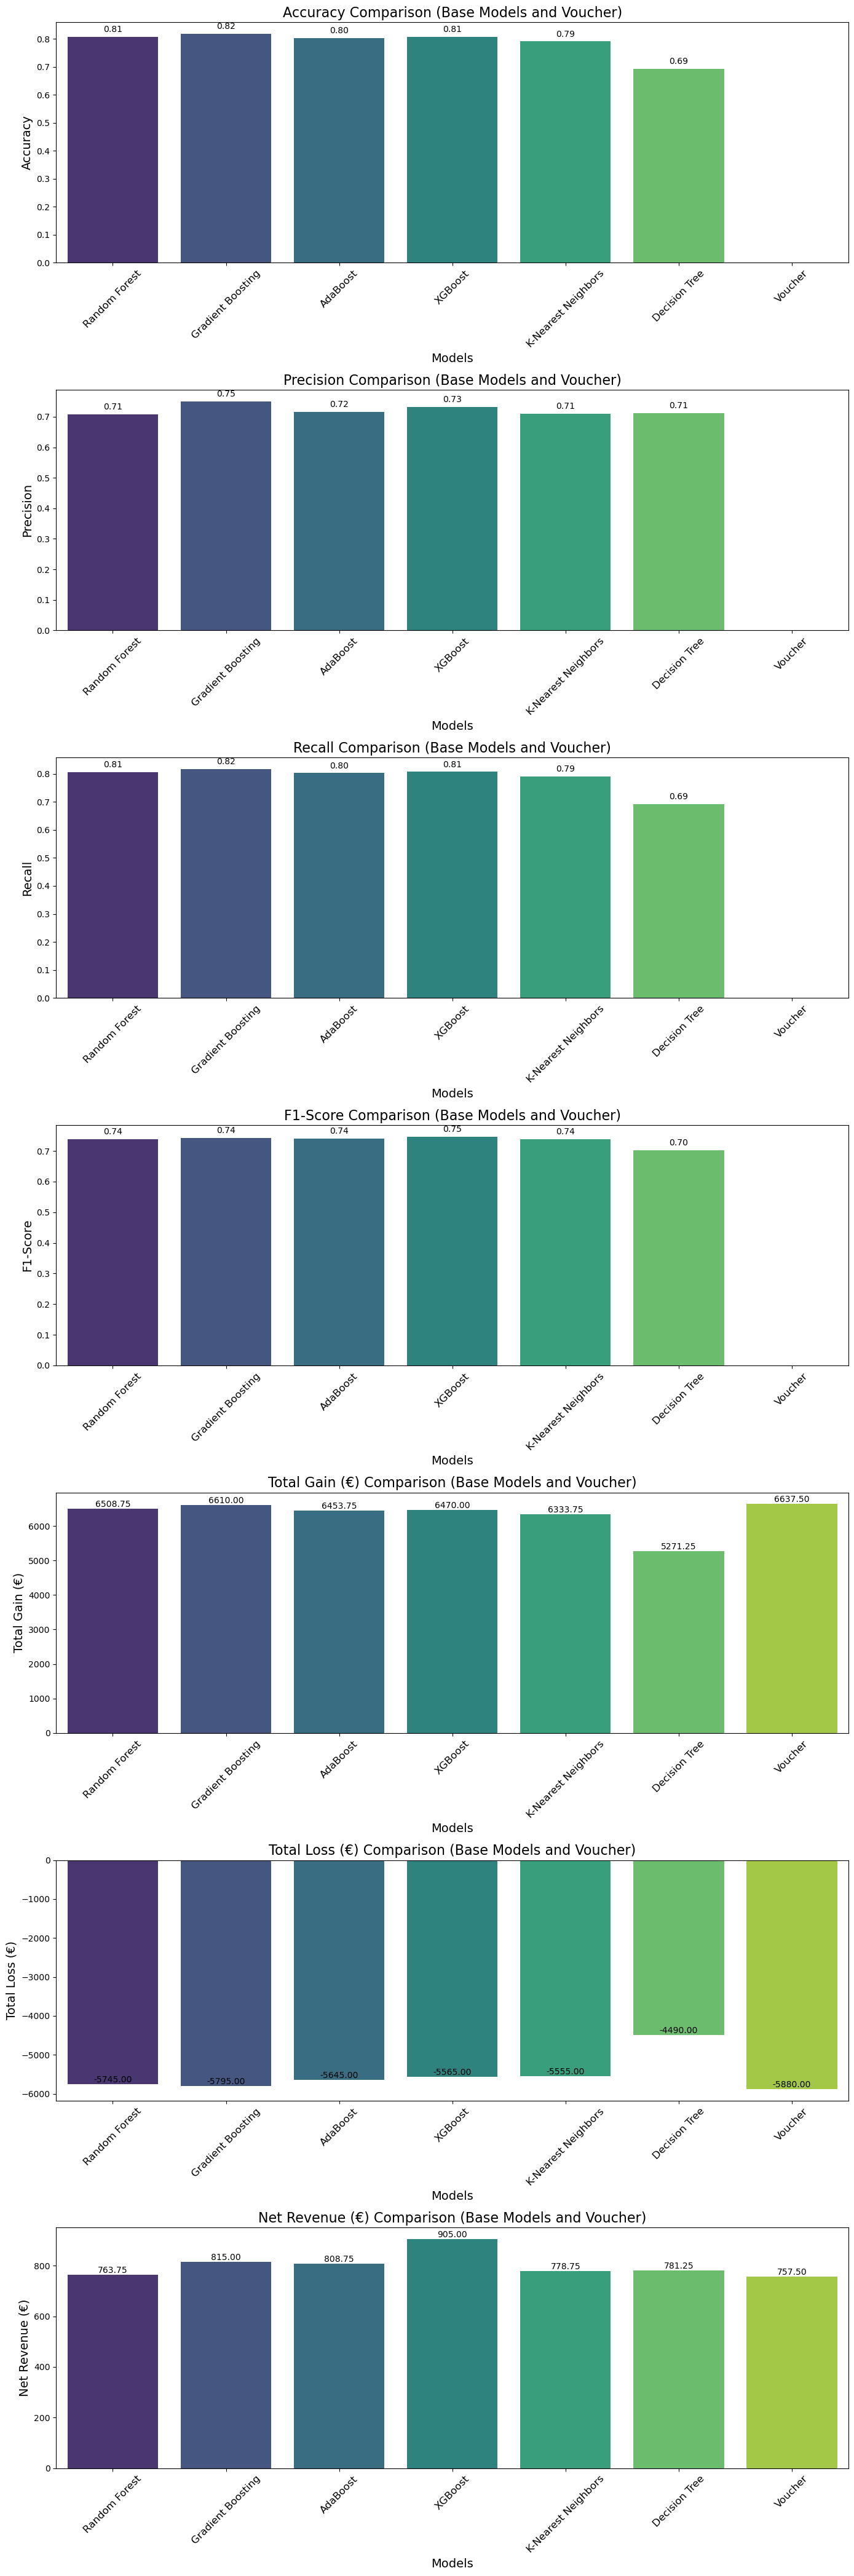

In [88]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the custom revenue metric
def custom_revenue_metric(y_true, y_pred):
    tn_gain = 1.25  # Gain for True Negative
    fp_loss = -5    # Loss for False Positive

    true_negatives = (y_true == 0) & (y_pred == 0)
    false_positives = (y_true == 1) & (y_pred == 0)

    total_gain = true_negatives.sum() * tn_gain
    total_loss = false_positives.sum() * fp_loss
    net_revenue = total_gain + total_loss

    return total_gain, total_loss, net_revenue

# Example data: Replace with your actual data
# X_train, y_train, X_test, y_test must be defined in your environment
X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']
X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Define the base models
base_models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Dictionary to store evaluation results for base models
base_results = []

# Train and evaluate each base model
for model_name, model in base_models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Calculate standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    
    # Calculate custom revenue metric
    total_gain, total_loss, net_revenue = custom_revenue_metric(y_test, y_pred)
    
    # Append results
    base_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Total Gain (€)": total_gain,
        "Total Loss (€)": total_loss,
        "Net Revenue (€)": net_revenue
    })

# Convert results to a DataFrame
base_results_df = pd.DataFrame(base_results)

# Calculate "Voucher" scenario (all predictions are treated as 0)
def calculate_voucher_case(y_true):
    y_pred_voucher = np.zeros_like(y_true)  # All predictions are 0
    total_gain, total_loss, net_revenue = custom_revenue_metric(y_true, y_pred_voucher)
    return total_gain, total_loss, net_revenue

voucher_gain, voucher_loss, voucher_revenue = calculate_voucher_case(y_test)

# Add Voucher results to the DataFrame
voucher_results = {
    "Model": "Voucher",
    "Accuracy": None,
    "Precision": None,
    "Recall": None,
    "F1-Score": None,
    "Total Gain (€)": voucher_gain,
    "Total Loss (€)": voucher_loss,
    "Net Revenue (€)": voucher_revenue
}
base_results_df = pd.concat([base_results_df, pd.DataFrame([voucher_results])], ignore_index=True)

# Plotting
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Total Gain (€)", "Total Loss (€)", "Net Revenue (€)"]

plt.figure(figsize=(14, 6 * len(metrics)))

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)
    sns.barplot(
        data=base_results_df,
        x="Model",
        y=metric,
        palette="viridis"
    )
    for bar in plt.gca().patches:
        # Handle None values for Voucher case
        if bar.get_height() is not None:
            plt.gca().text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + 0.01,
                f"{bar.get_height():.2f}",
                ha="center",
                va="bottom",
                fontsize=10
            )
    plt.title(f"{metric} Comparison (Base Models and Voucher)", fontsize=16)
    plt.ylabel(metric, fontsize=14)
    plt.xlabel("Models", fontsize=14)
    plt.xticks(rotation=45, fontsize=12)

plt.tight_layout()
plt.show()


In [89]:
y_test.value_counts() 

target90
0    5310
1    1176
Name: count, dtype: int64

##  6  Model tuning 

### 6.1 Custom metric to optimizes

# Custom Revenue Metric Explanation

 The follwing is the logic the expected revenue of using the model to predict which costumer we should give a voucher and the winnig and losing reveneu expected depending of the model clasifications. Notice than a value of `0` is someone than should received a voucher that properly clasified this costumer will increase reveneu in €1.25 while clasifing  a `1` a person that no matter if will send a voucher as a `0` will decrease revenues in €5 so:  

1. **True Negative (TN)**: The model predicts no voucher for a customer who wouldn’t have bought again (`true == 0` and `pred == 0`).  
   - **Gain:** €1.25

2. **False Negative (FN)**: The model predicts no voucher for a customer who would have placed an order (`true == 1` and `pred == 0`).  
   - **Loss:** €5

No other cases affect this revenue calculation, The function sums the gains and losses for a final revenue score. In most cases the metric specificity will be a good want to choose in this problem (The true negative rate) but given that giving a voucher to a person who would buy again would cost 4 ricght prediction for churn or custom metric tries to optimize the expected revenue  


In [69]:
def custom_revenue_metric(y_true, y_pred):
    # Defining our winnings and losses of the confusion matrix
    tn_gain = 1.25  
    fn_loss = -5    

    total_gain = 0
    total_loss = 0
    revenue = 0

    for true, pred in zip(y_true, y_pred):
        if pred == 0 and true == 0:  # TN winnings of €1.25 each 
            total_gain += tn_gain
        elif pred == 0 and true == 1:  # FN losses of €5 each
            total_loss += fn_loss

    revenue = total_gain + total_loss
    return total_gain, total_loss, revenue


#  Code for grpah the best study 

In [77]:
import joblib
import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_rank
from optuna.visualization import plot_slice
from optuna.visualization import plot_timeline

study_decision = joblib.load("output/study_Decision_tree.joblib")

fig_history_deci = plot_optimization_history(study_decision)
fig_history_deci.show()

plot_dec = plot_parallel_coordinate(study_decision)

plot_dec.show()

plot_slice_dec =  plot_slice(study_decision)

plot_slice_dec.show()

fig_importances_deci = plot_param_importances(study_decision)
fig_importances_deci.show()

## 6.2 Tool for best Hyperparameter Optimization Optuna

Optuna is a  is a python library tha help for seraching the best hyperparameters for tour Machine learning models. It tries different combinations intelligently and stop unpromising ones early to save time.
Work as the following:

1. Whe choose a model i.e KNN set a objective normal metric such as acurracy or a custom one. 

2. We sugest values for the hyperparameters such as  n_neighbors(5,20) and leaf_size(30,80)

3. Last we create the study selective if we want to minizes the objective or in our case maximes the revenues and add the numer of trials.

The package will run the number of trial in each trial showing results, and intelligently trying parameter that are not performing well while keeping the ones that are 

for more info can be obtain in the following links:
https://optuna.org/
https://dl.acm.org/doi/10.1145/3292500.3330701

# 6.2 KNN model 

[I 2025-01-12 21:14:31,075] A new study created in memory with name: no-name-98cfbbb3-3c9c-4a3d-9bb2-c795d5dfffaf
[I 2025-01-12 21:14:31,539] Trial 0 finished with value: 775.0 and parameters: {'n_neighbors': 39, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-12 21:14:32,023] Trial 1 finished with value: 773.75 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-12 21:14:32,300] Trial 2 finished with value: 727.5 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-12 21:14:32,567] Trial 3 finished with value: 688.75 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-12 21:14:32,912] Trial 4 finished with value: 773.75 and parameters: {'n_neighbors': 37, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-12 21:14:33,232] Trial 5 finished with value:

Best Parameters (KNN): {'n_neighbors': 34, 'weights': 'distance', 'p': 2}
Best Net Revenue (KNN): 778.75

Total Money Won (KNN): €6633.75
Total Money Lost (KNN): €-5855.00
Net Revenue (KNN): €778.75

Accuracy (on test set, KNN): 0.819

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5310
           1       0.62      0.00      0.01      1176

    accuracy                           0.82      6486
   macro avg       0.72      0.50      0.45      6486
weighted avg       0.78      0.82      0.74      6486


Best KNN model saved at 'output/best_model_KNN.joblib'.
Complete KNN study saved at 'output/study_KNN.joblib'.

Process completed (KNN).


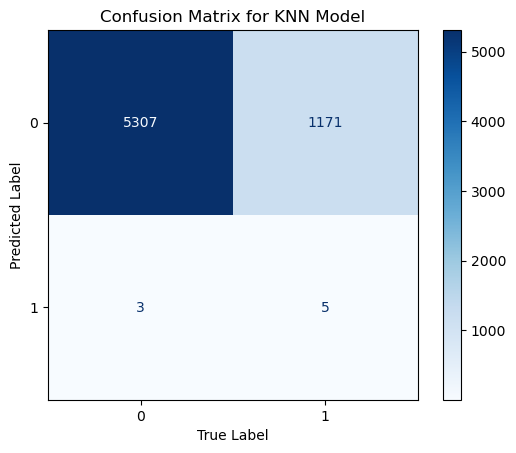

In [70]:
import os
import json
import joblib
import optuna

from optuna.samplers import TPESampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Setting our train and test set 

X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)  
    knn = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        p=p
    )
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    _, _, net_revenue = custom_revenue_metric(y_test, y_pred)

    return net_revenue

#  We used TPESampler to our result to be reproductable
sampler_knn = TPESampler(seed=10)  # For reproducibility
study_knn = optuna.create_study(direction='maximize', sampler=sampler_knn)
study_knn.optimize(objective_knn, n_trials=30)

print("Best Parameters (KNN):", study_knn.best_params)
print("Best Net Revenue (KNN):", study_knn.best_value)

# Know our best Knn model
knn_best_params = study_knn.best_params
knn_best_model = KNeighborsClassifier(
    **knn_best_params
)
knn_best_model.fit(X_train, y_train)

# Evaluate our model in the test set 
y_pred_knn = knn_best_model.predict(X_test)
total_gain_knn, total_loss_knn, final_revenue_knn = custom_revenue_metric(y_test, y_pred_knn)

print(f"\nTotal Money Won (KNN): €{total_gain_knn:.2f}")
print(f"Total Money Lost (KNN): €{total_loss_knn:.2f}")
print(f"Net Revenue (KNN): €{final_revenue_knn:.2f}")

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy (on test set, KNN): {accuracy_knn:.3f}")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Save in output ourt model
os.makedirs("output", exist_ok=True)

# Save best knn model
model_path_knn = "output/best_model_KNN.joblib"
joblib.dump(knn_best_model, model_path_knn)
print(f"\nBest KNN model saved at '{model_path_knn}'.")

# Save the study 
study_path_knn = "output/study_KNN.joblib"
joblib.dump(study_knn, study_path_knn)
print(f"Complete KNN study saved at '{study_path_knn}'.")

print("\nProcess completed (KNN).")


# Compute confusion matrix
cm_kn = confusion_matrix(y_test, y_pred_knn)

cm_kn = cm_kn.T

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kn, display_labels=knn_best_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for KNN Model")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()



Optimal Threshold: 0.28
Maximum Revenue with Optimal Threshold: €868.75

Final Revenue with Optimal Threshold: €868.75

Accuracy (on test set with threshold): 0.758

Classification Report (with threshold):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      5310
           1       0.22      0.14      0.17      1176

    accuracy                           0.76      6486
   macro avg       0.52      0.52      0.51      6486
weighted avg       0.72      0.76      0.73      6486



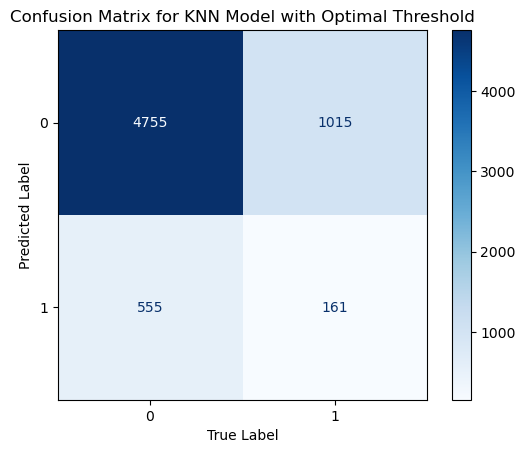

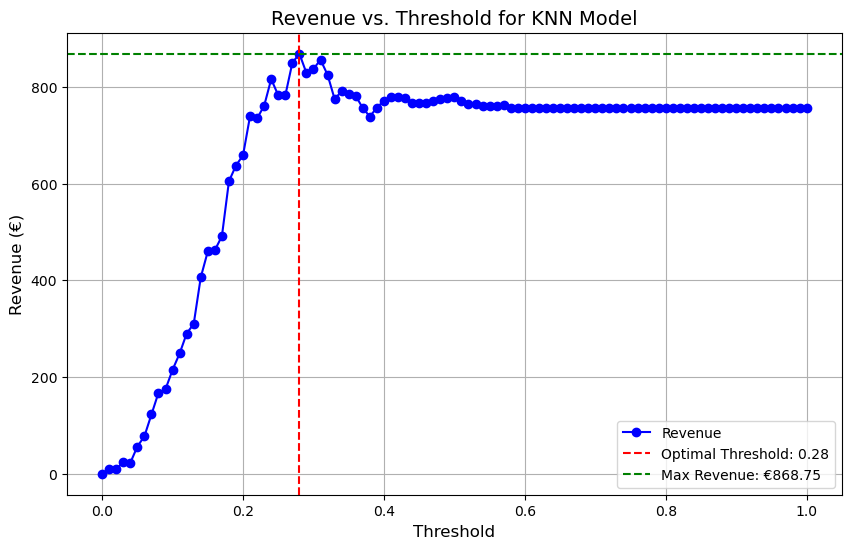

In [71]:
y_prob_knn = knn_best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

best_threshold_knn = 0
best_revenue_knn = float('-inf')

thresholds_knn = np.linspace(0, 1, 101)  # All possible thresholds
revenues_knn = []

# Calculate revenue for each threshold
for threshold_knn in thresholds_knn:
    y_pred_threshold_knn = (y_prob_knn >= threshold_knn).astype(int)
    
    _, _, revenue_knn = custom_revenue_metric(y_test, y_pred_threshold_knn)
    revenues_knn.append(revenue_knn)
    
    if revenue_knn > best_revenue_knn:
        best_revenue_knn = revenue_knn
        best_threshold_knn = threshold_knn

print(f"\nOptimal Threshold: {best_threshold_knn:.2f}")
print(f"Maximum Revenue with Optimal Threshold: €{best_revenue_knn:.2f}")

y_pred_final_knn = (y_prob_knn >= best_threshold_knn).astype(int)

# Final revenue
_, _, final_revenue_threshold_knn = custom_revenue_metric(y_test, y_pred_final_knn)
print(f"\nFinal Revenue with Optimal Threshold: €{final_revenue_threshold_knn:.2f}")

# Final metrics
accuracy_final_knn = accuracy_score(y_test, y_pred_final_knn)
print(f"\nAccuracy (on test set with threshold): {accuracy_final_knn:.3f}")
print("\nClassification Report (with threshold):")
print(classification_report(y_test, y_pred_final_knn, zero_division=0))

cm_threshold_knn = confusion_matrix(y_test, y_pred_final_knn)

cm_threshold_knn = cm_threshold_knn.T

# Display updated confusion matrix
disp_threshold_knn = ConfusionMatrixDisplay(confusion_matrix=cm_threshold_knn, display_labels=knn_best_model.classes_)
disp_threshold_knn.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for KNN Model with Optimal Threshold")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Plot the revenue vs. threshold graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds_knn, revenues_knn, marker='o', linestyle='-', color='b', label='Revenue')
plt.axvline(best_threshold_knn, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold_knn:.2f}')
plt.axhline(best_revenue_knn, color='g', linestyle='--', label=f'Max Revenue: €{best_revenue_knn:.2f}')

# Add labels, title, and legend
plt.title('Revenue vs. Threshold for KNN Model', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Revenue (€)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


## 6.3 Random Forest

In [81]:
import os
import json
import joblib
import optuna

from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Para,eetrs
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)

    # Instantiate the Random Forest model
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Train on training data
    rf.fit(X_train, y_train)

    # Predict on test data
    y_pred_rf = rf.predict(X_test)

    # Calculate the revenue metric
    _, _, net_revenue = custom_revenue_metric(y_test, y_pred_rf)

    # Optuna will maximize net_revenue
    return net_revenue

# 
sampler_rf = TPESampler(seed=45)  # For reproducibility
study_rf = optuna.create_study(direction='maximize', sampler=sampler_rf)
study_rf.optimize(objective_rf, n_trials=10)

print("Best Parameters (Random Forest):", study_rf.best_params)
print("Best Net Revenue (Random Forest):", study_rf.best_value)

# =
rf_best_params = study_rf.best_params
rf_best_model = RandomForestClassifier(
    **rf_best_params,
    random_state=42
)
rf_best_model.fit(X_train, y_train)

# 
y_pred_rf = rf_best_model.predict(X_test)
total_gain_rf, total_loss_rf, final_revenue_rf = custom_revenue_metric(y_test, y_pred_rf)

print(f"\nTotal Money Won (Random Forest): €{total_gain_rf:.2f}")
print(f"Total Money Lost (Random Forest): €{total_loss_rf:.2f}")
print(f"Net Revenue (Random Forest): €{final_revenue_rf:.2f}")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy (on test set, Random Forest): {accuracy_rf:.3f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# 
os.makedirs("output", exist_ok=True)

model_path_rf = "output/best_model_RF.joblib"
joblib.dump(rf_best_model, model_path_rf)
print(f"\nBest Random Forest model saved at '{model_path_rf}'.")

study_path_rf = "output/study_RF.joblib"
joblib.dump(study_rf, study_path_rf)
print(f"Complete Random Forest study saved at '{study_path_rf}'.")

print("\nProcess completed (Random Forest).")


[I 2024-12-27 21:04:42,536] A new study created in memory with name: no-name-136f0ffc-1ebb-4f02-84db-a582fd924312
[I 2024-12-27 21:04:55,184] Trial 0 finished with value: 802.5 and parameters: {'n_estimators': 496, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 802.5.
[I 2024-12-27 21:05:01,002] Trial 1 finished with value: 781.25 and parameters: {'n_estimators': 250, 'max_depth': 26, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 0 with value: 802.5.
[I 2024-12-27 21:05:02,841] Trial 2 finished with value: 757.5 and parameters: {'n_estimators': 102, 'max_depth': 33, 'min_samples_split': 18, 'min_samples_leaf': 14}. Best is trial 0 with value: 802.5.
[I 2024-12-27 21:05:15,098] Trial 3 finished with value: 781.25 and parameters: {'n_estimators': 496, 'max_depth': 26, 'min_samples_split': 13, 'min_samples_leaf': 6}. Best is trial 0 with value: 802.5.
[I 2024-12-27 21:05:26,371] Trial 4 finished with value: 780.0 and parameters

Best Parameters (Random Forest): {'n_estimators': 496, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 2}
Best Net Revenue (Random Forest): 802.5

Total Money Won (Random Forest): €6622.50
Total Money Lost (Random Forest): €-5820.00
Net Revenue (Random Forest): €802.50

Accuracy (on test set, Random Forest): 0.819

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5310
           1       0.50      0.01      0.02      1176

    accuracy                           0.82      6486
   macro avg       0.66      0.50      0.46      6486
weighted avg       0.76      0.82      0.74      6486


Best Random Forest model saved at 'output/best_model_RF.joblib'.
Complete Random Forest study saved at 'output/study_RF.joblib'.

Process completed (Random Forest).


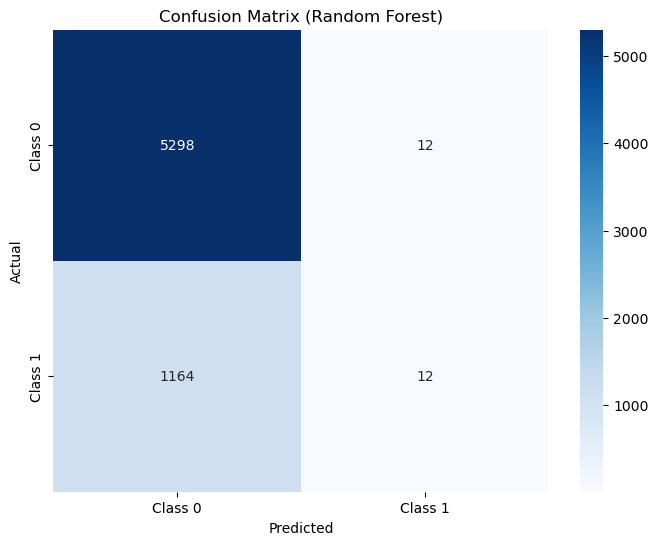

In [82]:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
y_prob_knn = knn_best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

best_threshold_knn = 0
best_revenue_knn = float('-inf')

thresholds_knn = np.linspace(0, 1, 101)  # All possible thresholds
revenues_knn = []

# Calculate revenue for each threshold
for threshold_knn in thresholds_knn:
    y_pred_threshold_knn = (y_prob_knn >= threshold_knn).astype(int)
    
    _, _, revenue_knn = custom_revenue_metric(y_test, y_pred_threshold_knn)
    revenues_knn.append(revenue_knn)
    
    if revenue_knn > best_revenue_knn:
        best_revenue_knn = revenue_knn
        best_threshold_knn = threshold_knn

print(f"\nOptimal Threshold: {best_threshold_knn:.2f}")
print(f"Maximum Revenue with Optimal Threshold: €{best_revenue_knn:.2f}")

y_pred_final_knn = (y_prob_knn >= best_threshold_knn).astype(int)

# Final revenue
_, _, final_revenue_threshold_knn = custom_revenue_metric(y_test, y_pred_final_knn)
print(f"\nFinal Revenue with Optimal Threshold: €{final_revenue_threshold_knn:.2f}")

# Final metrics
accuracy_final_knn = accuracy_score(y_test, y_pred_final_knn)
print(f"\nAccuracy (on test set with threshold): {accuracy_final_knn:.3f}")
print("\nClassification Report (with threshold):")
print(classification_report(y_test, y_pred_final_knn, zero_division=0))

cm_threshold_knn = confusion_matrix(y_test, y_pred_final_knn)

cm_threshold_knn = cm_threshold_knn.T

# Display updated confusion matrix
disp_threshold_knn = ConfusionMatrixDisplay(confusion_matrix=cm_threshold_knn, display_labels=knn_best_model.classes_)
disp_threshold_knn.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for KNN Model with Optimal Threshold")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Plot the revenue vs. threshold graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds_knn, revenues_knn, marker='o', linestyle='-', color='b', label='Revenue')
plt.axvline(best_threshold_knn, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold_knn:.2f}')
plt.axhline(best_revenue_knn, color='g', linestyle='--', label=f'Max Revenue: €{best_revenue_knn:.2f}')

# Add labels, title, and legend
plt.title('Revenue vs. Threshold for KNN Model', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Revenue (€)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()


#

## 6.4 Gradient Boosting

10 minutes 10 trials


In [83]:
import os
import json
import joblib
import optuna

from optuna.samplers import TPESampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']


# GB tunnig
def objective_gb(trial):
    # Suggest hyperparameters for Gradient Boosting
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    gb.fit(X_train, y_train)

    y_pred_gb = gb.predict(X_test)

    _, _, net_revenue = custom_revenue_metric(y_test, y_pred_gb)

    # Optuna will maximize net_revenue
    return net_revenue

# Seed for study
sampler_gb = TPESampler(seed=45)  # For reproducibility
study_gb = optuna.create_study(direction='maximize', sampler=sampler_gb)
study_gb.optimize(objective_gb, n_trials=10)

print("Best Parameters (Gradient Boosting):", study_gb.best_params)
print("Best Net Revenue (Gradient Boosting):", study_gb.best_value)

# GB best parameters
gb_best_params = study_gb.best_params
gb_best_model = GradientBoostingClassifier(
    **gb_best_params,
    random_state=42
)
gb_best_model.fit(X_train, y_train)

# Testing on validation
y_pred_gb = gb_best_model.predict(X_test)
total_gain_gb, total_loss_gb, final_revenue_gb = custom_revenue_metric(y_test, y_pred_gb)

print(f"\nTotal Money Won (Gradient Boosting): €{total_gain_gb:.2f}")
print(f"Total Money Lost (Gradient Boosting): €{total_loss_gb:.2f}")
print(f"Net Revenue (Gradient Boosting): €{final_revenue_gb:.2f}")

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nAccuracy (on test set, Gradient Boosting): {accuracy_gb:.3f}")
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb, zero_division=0))

os.makedirs("output", exist_ok=True)
model_path_gb = "output/best_model_GB.joblib"
joblib.dump(gb_best_model, model_path_gb)
print(f"\nBest Gradient Boosting model saved at '{model_path_gb}'.")

study_path_gb = "output/study_GB.joblib"
joblib.dump(study_gb, study_path_gb)
print(f"Complete Gradient Boosting study saved at '{study_path_gb}'.")

print("\nProcess completed (Gradient Boosting).")


[I 2024-12-27 21:08:51,978] A new study created in memory with name: no-name-a05421e5-8a65-426c-9306-36eaf2b65311
[I 2024-12-27 21:11:16,232] Trial 0 finished with value: 896.25 and parameters: {'n_estimators': 496, 'max_depth': 29, 'learning_rate': 0.026045445589024878, 'min_samples_split': 3, 'min_samples_leaf': 9}. Best is trial 0 with value: 896.25.
[I 2024-12-27 21:11:29,700] Trial 1 finished with value: 828.75 and parameters: {'n_estimators': 263, 'max_depth': 5, 'learning_rate': 0.017428098823074157, 'min_samples_split': 4, 'min_samples_leaf': 13}. Best is trial 0 with value: 896.25.
[I 2024-12-27 21:13:23,363] Trial 2 finished with value: 817.5 and parameters: {'n_estimators': 436, 'max_depth': 34, 'learning_rate': 0.29068060676599544, 'min_samples_split': 10, 'min_samples_leaf': 13}. Best is trial 0 with value: 896.25.
[I 2024-12-27 21:14:41,659] Trial 3 finished with value: 881.25 and parameters: {'n_estimators': 177, 'max_depth': 49, 'learning_rate': 0.09867407125280987, 'mi

Best Parameters (Gradient Boosting): {'n_estimators': 224, 'max_depth': 42, 'learning_rate': 0.01288563359948042, 'min_samples_split': 19, 'min_samples_leaf': 5}
Best Net Revenue (Gradient Boosting): 912.5

Total Money Won (Gradient Boosting): €6402.50
Total Money Lost (Gradient Boosting): €-5490.00
Net Revenue (Gradient Boosting): €912.50

Accuracy (on test set, Gradient Boosting): 0.802

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5310
           1       0.29      0.07      0.11      1176

    accuracy                           0.80      6486
   macro avg       0.56      0.52      0.50      6486
weighted avg       0.73      0.80      0.75      6486


Best Gradient Boosting model saved at 'output/best_model_GB.joblib'.
Complete Gradient Boosting study saved at 'output/study_GB.joblib'.

Process completed (Gradient Boosting).


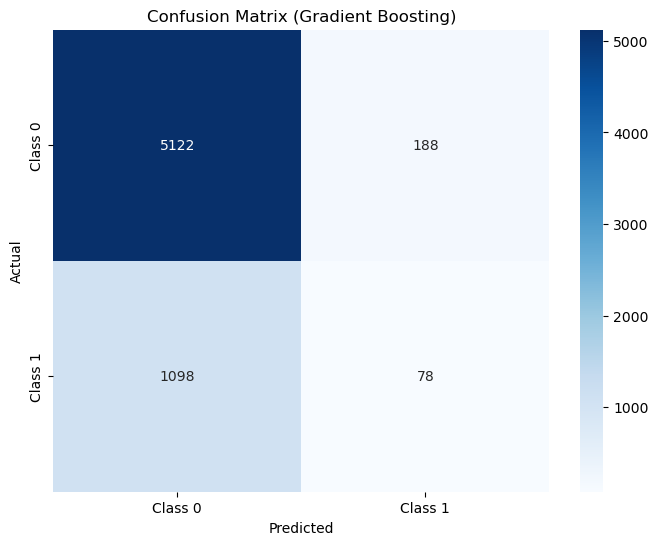

In [85]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 6.5  AdaBoost 

In [ ]:
import os
import json
import joblib
import optuna

from optuna.samplers import TPESampler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns



X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']


# Adaboost
def objective_ab(trial):
    # Suggest hyperparameters for AdaBoost
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)

    # Instantiate the AdaBoost model
    ab = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=451
    )

    ab.fit(X_train, y_train)

    y_pred_ab = ab.predict(X_test)

    _, _, net_revenue = custom_revenue_metric(y_test, y_pred_ab)

    return net_revenue

# Seet seed for study
sampler_ab = TPESampler(seed=444)# For reproducibility
study_ab = optuna.create_study(direction='maximize', sampler=sampler_ab)
study_ab.optimize(objective_ab, n_trials=100)

print("Best Parameters (AdaBoost):", study_ab.best_params)
print("Best Net Revenue (AdaBoost):", study_ab.best_value)

ab_best_params = study_ab.best_params
ab_best_model = AdaBoostClassifier(
    **ab_best_params,
    random_state=42
)
ab_best_model.fit(X_train, y_train)

# 
y_pred_ab = ab_best_model.predict(X_test)
total_gain_ab, total_loss_ab, final_revenue_ab = custom_revenue_metric(y_test, y_pred_ab)

print(f"\nTotal Money Won (AdaBoost): €{total_gain_ab:.2f}")
print(f"Total Money Lost (AdaBoost): €{total_loss_ab:.2f}")
print(f"Net Revenue (AdaBoost): €{final_revenue_ab:.2f}")

accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f"\nAccuracy (on test set, AdaBoost): {accuracy_ab:.3f}")
print("\nClassification Report (AdaBoost):")
print(classification_report(y_test, y_pred_ab, zero_division=0))
# 
os.makedirs("output", exist_ok=True)

model_path_ab = "output/best_model_AB.joblib"
joblib.dump(ab_best_model, model_path_ab)
print(f"\nBest AdaBoost model saved at '{model_path_ab}'.")

study_path_ab = "output/study_AB.joblib"
joblib.dump(study_ab, study_path_ab)
print(f"Complete AdaBoost study saved at '{study_path_ab}'.")

print("\nProcess completed (AdaBoost).")


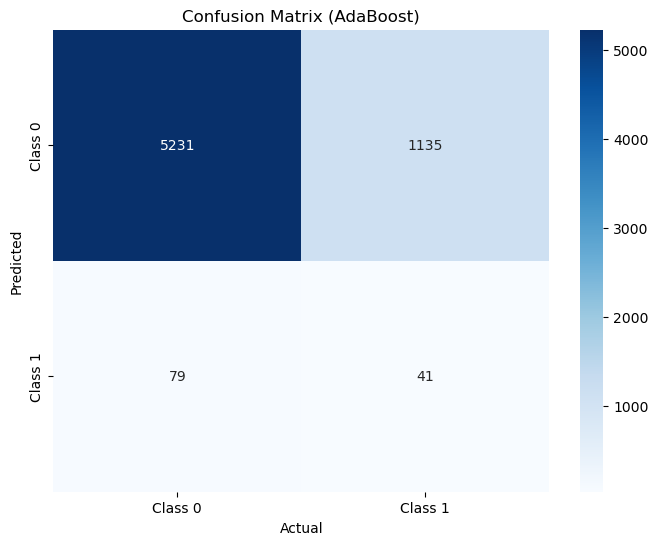

In [93]:

conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
conf_matrix_ab = conf_matrix_ab.T
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ab, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (AdaBoost)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# 6.6 XGBoost 

In [ ]:
import os
import json
import joblib
import optuna

from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

def objective_xgb(trial):
    # Suggest hyperparameters for XGBoost
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)

    # Instantiate the XGBoost model
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        gamma=gamma,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    )

    # Train on training data
    xgb.fit(X_train, y_train)

    # Predict on test data
    y_pred_xgb = xgb.predict(X_test)

    # Calculate the revenue metric
    _, _, net_revenue = custom_revenue_metric(y_test, y_pred_xgb)

    # Optuna will maximize net_revenue
    return net_revenue

#
sampler_xgb = TPESampler(seed=448)  # For reproducibility
study_xgb = optuna.create_study(direction='maximize', sampler=sampler_xgb)
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best Parameters (XGBoost):", study_xgb.best_params)
print("Best Net Revenue (XGBoost):", study_xgb.best_value)

# 
xgb_best_params = study_xgb.best_params
xgb_best_model = XGBClassifier(
    **xgb_best_params,
    random_state=415,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_best_model.fit(X_train, y_train)

# 
y_pred_xgb = xgb_best_model.predict(X_test)
total_gain_xgb, total_loss_xgb, final_revenue_xgb = custom_revenue_metric(y_test, y_pred_xgb)

print(f"\nTotal Money Won (XGBoost): €{total_gain_xgb:.2f}")
print(f"Total Money Lost (XGBoost): €{total_loss_xgb:.2f}")
print(f"Net Revenue (XGBoost): €{final_revenue_xgb:.2f}")

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nAccuracy (on test set, XGBoost): {accuracy_xgb:.3f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# 
os.makedirs("output", exist_ok=True)

model_path_xgb = "output/best_model_XGB.joblib"
joblib.dump(xgb_best_model, model_path_xgb)
print(f"\nBest XGBoost model saved at '{model_path_xgb}'.")

study_path_xgb = "output/study_XGB.joblib"
joblib.dump(study_xgb, study_path_xgb)
print(f"Complete XGBoost study saved at '{study_path_xgb}'.")

print("\nProcess completed (XGBoost).")


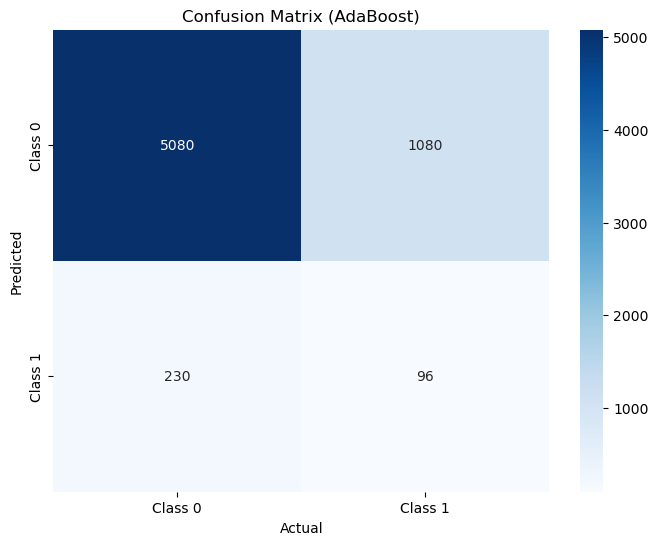

In [77]:

conf_matrix_XG= confusion_matrix(y_test, y_pred_xgb)
conf_matrix_XG = conf_matrix_XG.T
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XG, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (AdaBoost)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


In [82]:
Intentional erros 

SyntaxError: invalid syntax (3389880427.py, line 1)

## 7 results

C:\Users\inven\AppData\Local\Temp\ipykernel_9672\2548816053.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
C:\Users\inven\AppData\Local\Temp\ipykernel_9672\2548816053.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
C:\Users\inven\AppData\Local\Temp\ipykernel_9672\2548816053.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
C:\Users\inven\AppData\Local\Temp\ipy

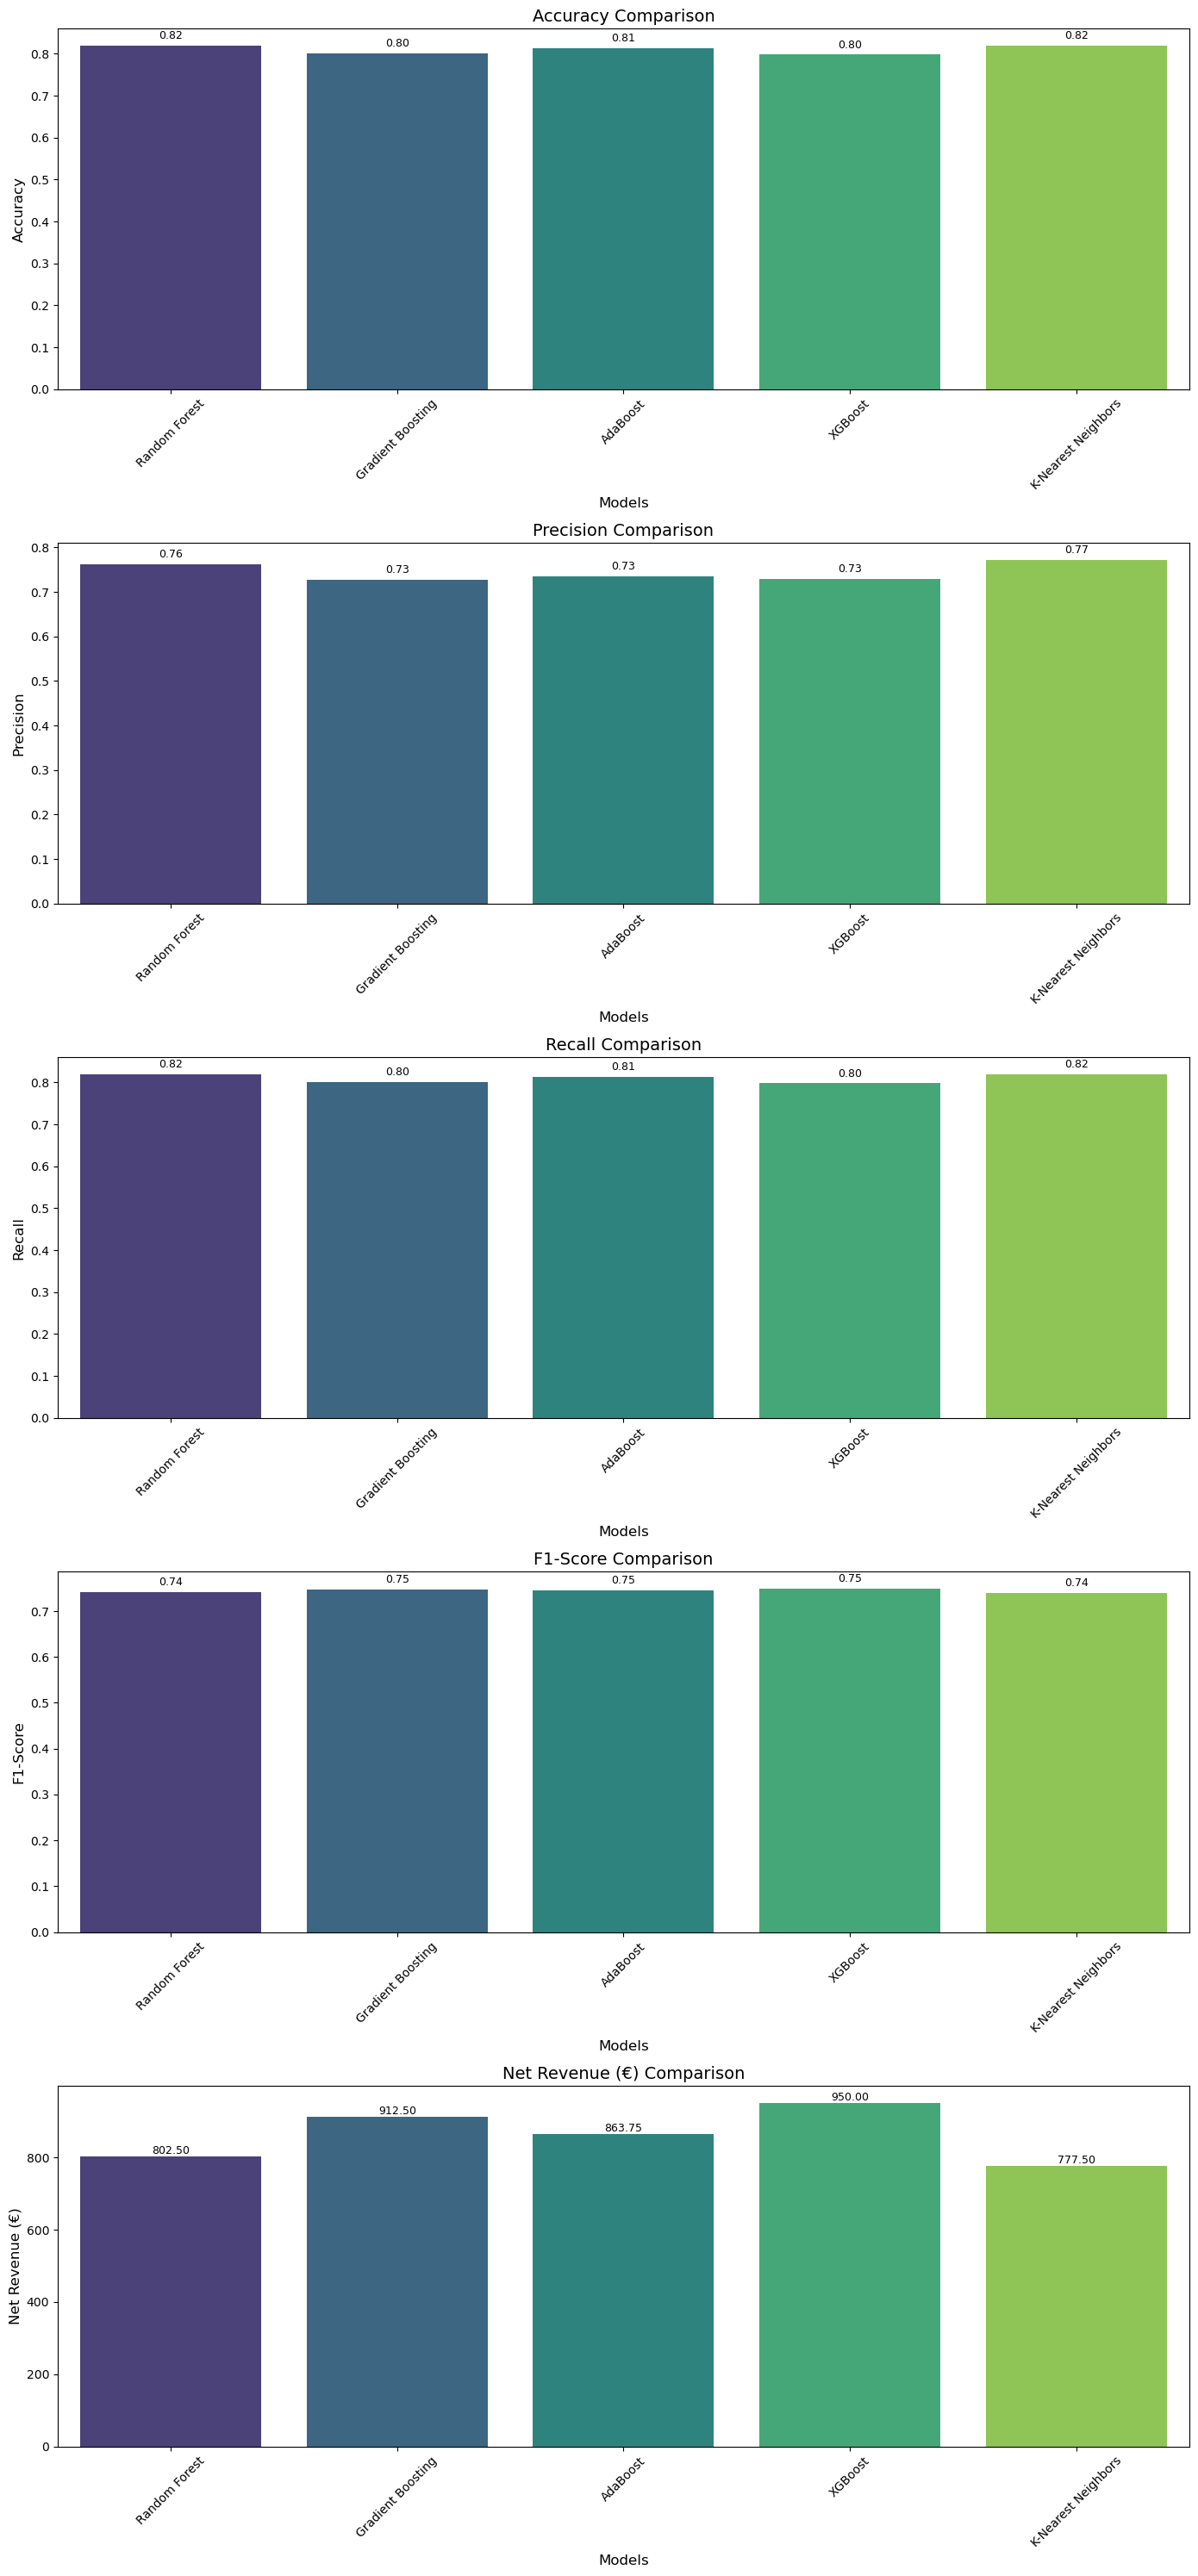

In [91]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']


# Custom revenue metric function
def custom_revenue_metric(y_true, y_pred):
    tn_gain = 1.25  # Gain for True Negative
    fp_loss = -5    # Loss for False Positive

    true_negatives = (y_true == 0) & (y_pred == 0)
    false_positives = (y_true == 1) & (y_pred == 0)

    total_gain = true_negatives.sum() * tn_gain
    total_loss = false_positives.sum() * fp_loss
    net_revenue = total_gain + total_loss

    return total_gain, total_loss, net_revenue

# List of model file paths and names
model_files = {
    "Random Forest": "output/best_model_RF.joblib",
    "Gradient Boosting": "output/best_model_GB.joblib",
    "AdaBoost": "output/best_model_AB.joblib",
    "XGBoost": "output/best_model_XGB.joblib",
    "K-Nearest Neighbors": "output/best_model_KNN.joblib"
}

# Dictionary to store evaluation results
results = []

# Load each model, evaluate, and collect metrics
for model_name, file_path in model_files.items():
    # Load the model
    model = joblib.load(file_path)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted", zero_division=0)
    recall = recall_score(y_test, y_pred, average="weighted", zero_division=0)
    f1 = f1_score(y_test, y_pred, average="weighted", zero_division=0)
    
    # Calculate custom revenue metric
    total_gain, total_loss, net_revenue = custom_revenue_metric(y_test, y_pred)
    
    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Net Revenue (€)": net_revenue
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

import seaborn as sns
import matplotlib.pyplot as plt

# Sample data for testing the plotting (remove this and replace with actual results_df in your environment)
# results_df = pd.DataFrame(results)
# Create separate bar plots for each metric
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "Net Revenue (€)"]

plt.figure(figsize=(14, 6 * len(metrics)))

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)
    sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
    
    # Add values on top of bars
    for bar in plt.gca().patches:
        plt.gca().text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{bar.get_height():.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )
    
    plt.title(f"{metric} Comparison", fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Models", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



# Balancing the data 

In [122]:
# - Train_finish_ohe
# - Test_finish_ohe
# with the same columns as in your previous example.

X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Mostrar los tamaños originales y balanceados
print("Original X_train shape:", X_train.shape)
print("Original y_train distribution:\n", y_train.value_counts())
print("Balanced X_train shape:", X_train_balanced.shape)
print("Balanced y_train distribution:\n", y_train_balanced.value_counts())


Original X_train shape: (25942, 63)
Original y_train distribution:
 target90
0    21067
1     4875
Name: count, dtype: int64
Balanced X_train shape: (42134, 63)
Balanced y_train distribution:
 target90
0    21067
1    21067
Name: count, dtype: int64


[I 2024-12-28 00:46:19,780] A new study created in memory with name: no-name-a40cd1f8-230d-468d-963f-eaad28caf959
[I 2024-12-28 00:46:20,247] Trial 0 finished with value: 868.75 and parameters: {'criterion': 'entropy', 'max_depth': 48, 'min_samples_split': 10, 'min_samples_leaf': 25}. Best is trial 0 with value: 868.75.
[I 2024-12-28 00:46:20,685] Trial 1 finished with value: 878.75 and parameters: {'criterion': 'entropy', 'max_depth': 250, 'min_samples_split': 54, 'min_samples_leaf': 42}. Best is trial 1 with value: 878.75.
[I 2024-12-28 00:46:21,141] Trial 2 finished with value: 836.25 and parameters: {'criterion': 'entropy', 'max_depth': 387, 'min_samples_split': 30, 'min_samples_leaf': 60}. Best is trial 1 with value: 878.75.
[I 2024-12-28 00:46:21,568] Trial 3 finished with value: 987.5 and parameters: {'criterion': 'gini', 'max_depth': 546, 'min_samples_split': 58, 'min_samples_leaf': 25}. Best is trial 3 with value: 987.5.
[I 2024-12-28 00:46:22,114] Trial 4 finished with value:

Best Parameters: {'criterion': 'gini', 'max_depth': 602, 'min_samples_split': 54, 'min_samples_leaf': 8}
Best Net Revenue: 1016.25

Total Money Won: €6176.25
Total Money Lost: €-5160.00
Net Revenue: €1016.25

Accuracy (on test set): 0.784

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5310
           1       0.28      0.12      0.17      1176

    accuracy                           0.78      6486
   macro avg       0.55      0.53      0.52      6486
weighted avg       0.73      0.78      0.75      6486


Best model saved at 'output/best_model_Decision_tree.joblib'.
Complete study saved at 'output/study_Decision_tree.joblib'.

Process completed.


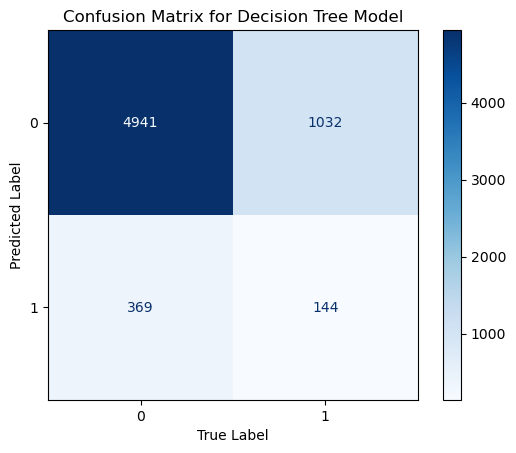

In [124]:
import os
import json
import joblib
import optuna

from optuna.samplers import TPESampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# ==========================================
# 0) Training and test data
# ==========================================
# Balancear el conjunto de entrenamiento con SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Definición de datos de prueba
X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# ==========================================
# 1) Custom revenue metric
# ==========================================
def custom_revenue_metric(y_true, y_pred):
    tn_gain = 1.25  # Gain for True Negative
    fp_loss = -5    # Loss for False Positive

    true_negatives = (y_true == 0) & (y_pred == 0)
    false_positives = (y_true == 1) & (y_pred == 0)

    total_gain = true_negatives.sum() * tn_gain
    total_loss = false_positives.sum() * fp_loss
    net_revenue = total_gain + total_loss

    return total_gain, total_loss, net_revenue

# ==========================================
# 2) Objective function for Optuna
# ==========================================
def objective(trial):
    # Suggest hyperparameters for DecisionTree
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 2, 700)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 60)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 60)

    # Instantiate the model
    dt = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Train with training data
    dt.fit(X_train_balanced, y_train_balanced)
    
    # Predict on test data
    y_pred = dt.predict(X_test)
    
    # Calculate revenue metric
    _, _, net_revenue = custom_revenue_metric(y_test, y_pred)
    
    # Optuna will maximize net_revenue
    return net_revenue

# ==========================================
# 3) Create and run the study with Optuna
#    (using a TPESampler with seed=10)
# ==========================================
sampler = TPESampler(seed=545)  # For reproducibility
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)

print("Best Parameters:", study.best_params)
print("Best Net Revenue:", study.best_value)

# ==========================================
# 4) Train final model with best params
# ==========================================
best_params = study.best_params
best_model = DecisionTreeClassifier(
    **best_params,
    random_state=38
)

# Asegúrate de usar los datos balanceados para el entrenamiento final
best_model.fit(X_train_balanced, y_train_balanced)

# ==========================================
# 5) Final evaluation on the test set
# ==========================================
y_pred = best_model.predict(X_test)
total_gain, total_loss, final_revenue = custom_revenue_metric(y_test, y_pred)

print(f"\nTotal Money Won: €{total_gain:.2f}")
print(f"Total Money Lost: €{total_loss:.2f}")
print(f"Net Revenue: €{final_revenue:.2f}")

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy (on test set): {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# ==========================================
# 6) Save the study and the best model
#    using joblib 
# ==========================================
os.makedirs("output", exist_ok=True)

# 6.a) Save the best model
model_path = "output/best_model_Decision_tree.joblib"
joblib.dump(best_model, model_path)
print(f"\nBest model saved at '{model_path}'.")

# 6.b) Save the complete 'study' object
study_path = "output/study_Decision_tree.joblib"
joblib.dump(study, study_path)
print(f"Complete study saved at '{study_path}'.")

print("\nProcess completed.")

# ==========================================
# 7) Confusion matrix and visualization
# ==========================================
# Compute confusion matrix
cm_deci = confusion_matrix(y_test, y_pred)

# Transpose the confusion matrix for horizontal True labels and vertical Predicted labels
cm_deci = cm_deci.T

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_deci, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for Decision Tree Model")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()


# Test set 

In [125]:
import pandas as pd
true_test = pd.read_csv('./data/test.csv',sep=';')
true_test.head(5)

C:\Users\inven\AppData\Local\Temp\ipykernel_7932\2263162858.py:2: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
0,6044,2008-07-02,2,0,12,2008-07-02,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,36314,2008-09-09,1,0,4,2008-09-09,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,41932,2008-10-11,0,0,5,2008-10-11,1,1,2,0,...,0,0,0,0,1,0,0,0,0,0
3,3194,2008-09-15,2,0,12,2008-09-15,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35363,2008-04-02,0,0,0,2008-04-02,0,1,3,0,...,1,0,0,0,0,0,0,0,1,0


In [132]:
true_test

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
0,6044,2008-07-02,2,0,12,2008-07-02,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,36314,2008-09-09,1,0,4,2008-09-09,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,41932,2008-10-11,0,0,5,2008-10-11,1,1,2,0,...,0,0,0,0,1,0,0,0,0,0
3,3194,2008-09-15,2,0,12,2008-09-15,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35363,2008-04-02,0,0,0,2008-04-02,0,1,3,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32422,21877,2008-04-07,0,0,10,2008-04-07,0,1,0,0,...,0,0,0,0,0,0,0,0,5,0
32423,36677,2008-10-30,1,0,8,2008-10-30,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0
32424,40937,2008-07-17,2,0,12,2008-07-17,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
32425,35538,2008-07-03,0,0,11,2008-07-03,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
# Step 1: Drop irrelevant columns from true_test
true_test_variables = true_test.drop(columns=["delivpostcode", "advertisingdatacode", "points"])

# Step 2: Define categorical mappings
categorical_mappings = {
    'salutation': {0: 'Ms.', 1: 'Mr.', 2: 'Company'},
    'title': {0: 'No', 1: 'Yes'},
    'domain': {
        0: 'aol.com', 1: 'arcor.de', 2: 'freenet.de', 3: 'gmail.com',
        4: 'gmx.de', 5: 'hotmail.de', 6: 'online.de', 7: 'onlinehome.de',
        8: 't-online.de', 9: 'web.de', 10: 'yahoo.com', 11: 'yahoo.de', 12: 'others'
    },
    'newsletter': {0: 'No', 1: 'Yes'},
    'model': {1: '1', 2: '2', 3: '3'},
    'paymenttype': {
        0: 'Payment_on_invoice', 1: 'Cash_payment',
        2: 'Transfer_from_current_account', 3: 'Transfer_from_credit_card'
    },
    'deliverytype': {0: 'Dispatch', 1: 'Collection'},
    'voucher': {0: 'No', 1: 'Yes'},
    'case': {1: 'Low', 5: 'High'},
    'gift': {0: 'No', 1: 'Yes'},
    'shippingcosts': {0: 'No', 1: 'Yes'}
}

# Step 3: One-hot encode categorical variables
columns_to_encode = list(categorical_mappings.keys())

ohe = (
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    .set_output(transform="pandas")
)

encoded_columns = ohe.fit_transform(true_test_variables[columns_to_encode])

feature_names = ohe.get_feature_names_out(columns_to_encode)
renamed_columns = [
    f"{col}_{categorical_mappings[col].get(int(category.split('_')[1]), category)}"
    if col in categorical_mappings and category.split('_')[1].isdigit()
    else category
    for col, category in zip(feature_names, feature_names)
]

encoded_columns.columns = renamed_columns

# Combine original and encoded columns
non_encoded_columns = true_test_variables.drop(columns=columns_to_encode)
true_test_encoded = pd.concat([non_encoded_columns.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

# Step 4: Date processing and delivery difference calculation
true_test_encoded['deliverydatereal'] = pd.to_datetime(true_test_encoded['deliverydatereal'], errors='coerce')
true_test_encoded['deliverydatepromised'] = pd.to_datetime(true_test_encoded['deliverydatepromised'], errors='coerce')

true_test_encoded['delivery_difference'] = (
    true_test_encoded['deliverydatereal'] - true_test_encoded['deliverydatepromised']
).dt.days

mean_difference = true_test_encoded['delivery_difference'].mean(skipna=True)
std_difference = true_test_encoded['delivery_difference'].std(skipna=True)

true_test_encoded['delivery_difference'] = true_test_encoded['delivery_difference'].fillna(mean_difference)
true_test_encoded.loc[
    true_test_encoded['delivery_difference'] > 90, 'delivery_difference'
] = mean_difference + std_difference

# Step 5: Classify deliveries
def classify_delivery(days_diff):
    if pd.isna(days_diff):
        return 'Invalid Date'
    elif days_diff < 0:
        return 'Early'
    elif days_diff == 0:
        return 'On Time'
    else:
        return 'Late'

true_test_encoded['delivery_status'] = true_test_encoded['delivery_difference'].apply(classify_delivery)

# Step 6: Product diversity calculation
true_test_encoded['Product_diversity'] = np.count_nonzero(
    true_test_encoded[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10']], axis=1
)

# Drop date-related columns
true_test_encoded.drop(columns=["date", "datecreated", "deliverydatepromised", "deliverydatereal"], inplace=True)

# Step 7: Encode delivery_status
ohe_delivery_status = OneHotEncoder(sparse_output=False)
delivery_status_encoded = ohe_delivery_status.fit_transform(true_test_encoded[['delivery_status']])

df_delivery_status_ohe = pd.DataFrame(
    delivery_status_encoded,
    columns=ohe_delivery_status.get_feature_names_out(['delivery_status'])
)

df_delivery_status_ohe.columns = [
    col.replace("delivery_status_", "ds_") for col in df_delivery_status_ohe.columns
]

true_test_finish_ohe = pd.concat(
    [true_test_encoded.drop(columns=['delivery_status']), df_delivery_status_ohe],
    axis=1
)


In [137]:
true_test_finish_ohe.shape

(32427, 64)

In [138]:
true_test_finish_ohe.head(5)

,customernumber,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,...,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,Product_diversity,ds_Early,ds_Late,ds_On Time
0,6044,29,1,0,3,0,0,0,2,0,...,1.0,1.0,0.0,1.0,0.0,-29.000000,1,1.0,0.0,0.0
1,36314,31,1,1,260,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.000000,1,0.0,0.0,1.0
2,41932,50,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,-16.361164,1,1.0,0.0,0.0
3,3194,65,1,0,719,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,-1.000000,1,1.0,0.0,0.0
4,35363,20,2,0,636,0,0,0,0,1,...,0.0,1.0,0.0,1.0,0.0,-30.000000,2,1.0,0.0,0.0


In [139]:
true_test_finish_ohe.drop(columns="customernumber",inplace=True)

In [140]:
xgb_best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7771391584949549, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=1.8753416011708026, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2441123702981087,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=262, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [141]:
predictions = xgb_best_model.predict(X_test)
    
    # If the model provides probabilities and they are needed, use `predict_proba`
    # probabilities = xgb_best_model.predict_proba(X_test)
    
    # Display predictions to the user
predictions_df = pd.DataFrame(predictions, columns=["Predictions"])

In [143]:
predictions_df.Predictions.describe()

count    6486.000000
mean        0.060900
std         0.239166
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Predictions, dtype: float64

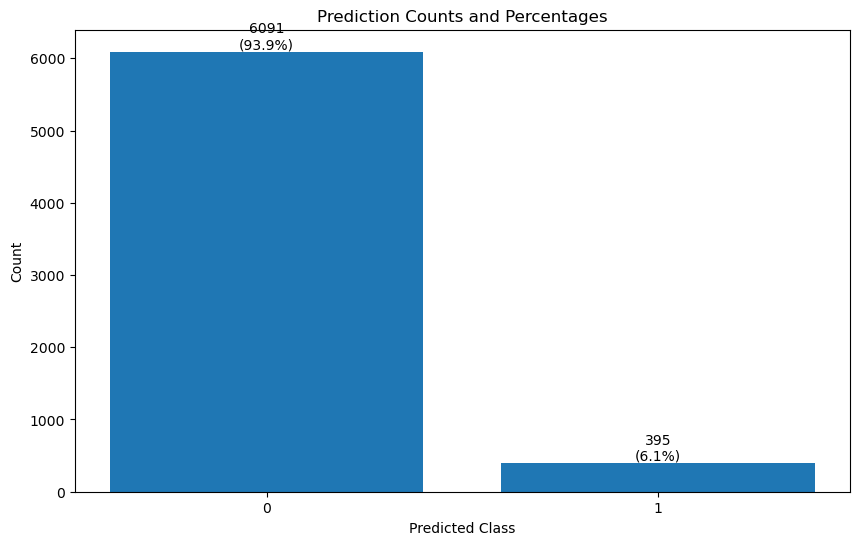

In [146]:
# Calculate total and percentage for each prediction class
total_predictions = len(predictions_df)
prediction_summary = prediction_counts.to_frame("Count")
prediction_summary["Percentage"] = (prediction_summary["Count"] / total_predictions) * 100

# Plot a bar chart with totals and percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(prediction_summary.index, prediction_summary["Count"], tick_label=prediction_summary.index)

# Annotate the bars with count and percentage
for bar, count, percentage in zip(bars, prediction_summary["Count"], prediction_summary["Percentage"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(count)}\n({percentage:.1f}%)",
        ha='center',
        va='bottom'
    )

plt.title("Prediction Counts and Percentages")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()